## Problem Description
A Chinese automobile company Teclov_chinese aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:

• Which variables are significant in predicting the price of a car

• How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

### Business Goal
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to understand the pricing dynamics of a new market. Data Preparation

• There is a variable named CarName which is comprised of two parts:

the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building.

### Solution Guideline 
1. Data cleaning
2. Exploratory Data Analysis
3. Feature Engineering
4. Model choice and tuning
5. Model performance and evaluation
6. Feature importance
7. Final Summary

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [184]:
data = pd.read_csv('CarPrice.csv')
print("Dimension of dataset is: ", data.shape)
data.head()

Dimension of dataset is:  (205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#### Data Cleaning
 - Since the feature CarName has a joint feature description, it has to be splitted into car company and car model. Car model will be the only independent variable considered for the predictions.
 - Car_ID will be dropped since this is an ID which has no effect on the target variable.

In [186]:
# Using a lamda function to split the CarName feature
CompanyName = data['CarName'].apply(lambda x : x.split(' ') [0])

# Derived feature will be inserted on position 3 not at the end
data.insert(3, "CompanyName", CompanyName)

data.drop(['CarName'],axis=1,inplace=True)
data.drop(['car_ID'],axis=1,inplace=True)

data.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [187]:
# This prints out the unique records of the features classified as objects only
# This helps in data cleaning to know if there are misspelled words or not.

sub_data = data.select_dtypes(include=['object'])
pd.Series({col:sub_data[col].unique() for col in sub_data})

CompanyName       [alfa-romero, audi, bmw, chevrolet, dodge, hon...
fueltype                                              [gas, diesel]
aspiration                                             [std, turbo]
doornumber                                              [two, four]
carbody             [convertible, hatchback, sedan, wagon, hardtop]
drivewheel                                          [rwd, fwd, 4wd]
enginelocation                                        [front, rear]
enginetype                 [dohc, ohcv, ohc, l, rotor, ohcf, dohcv]
cylindernumber         [four, six, five, three, twelve, two, eight]
fuelsystem           [mpfi, 2bbl, mfi, 1bbl, spfi, 4bbl, idi, spdi]
dtype: object

 - From above unique record values, there is no redundancy inform of spelling error.
 - CompanyName has data type as Object but wasn't included in this analaysis. I will be exploring this feature too to ensure it's clean and ready for use. features 

In [188]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

  From above, there are redundant company names because of spelling error in the data. These records all have to be assigned to a single value to get model performance and accuracy as expected. 
  Example is: 'toyota and toyouta'

In [189]:
# Replacing the misspelled values with one variable
data = data.replace(to_replace ="maxda", value ="mazda") 
data = data.replace(to_replace ="porcshce", value ="porsche") 
data = data.replace(to_replace ="toyouta", value ="toyota") 
data = data.replace(to_replace ="vokswagen", value ="volkswagen") 
data = data.replace(to_replace ="vw", value ="volkswagen")
data = data.replace(to_replace ="Nissan", value ="nissan")

In [190]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Exploratory Data Analysis
First to perform a Linear regression, 5 Key assumptions must be met, they are:
- Linear relationship between dependent and Non dependent variables
- No multi-collinearity  

After predicting y values, the residuals must be:
- Normality of Error Distribution 
- Independence of errors
- Homo-scedasticity

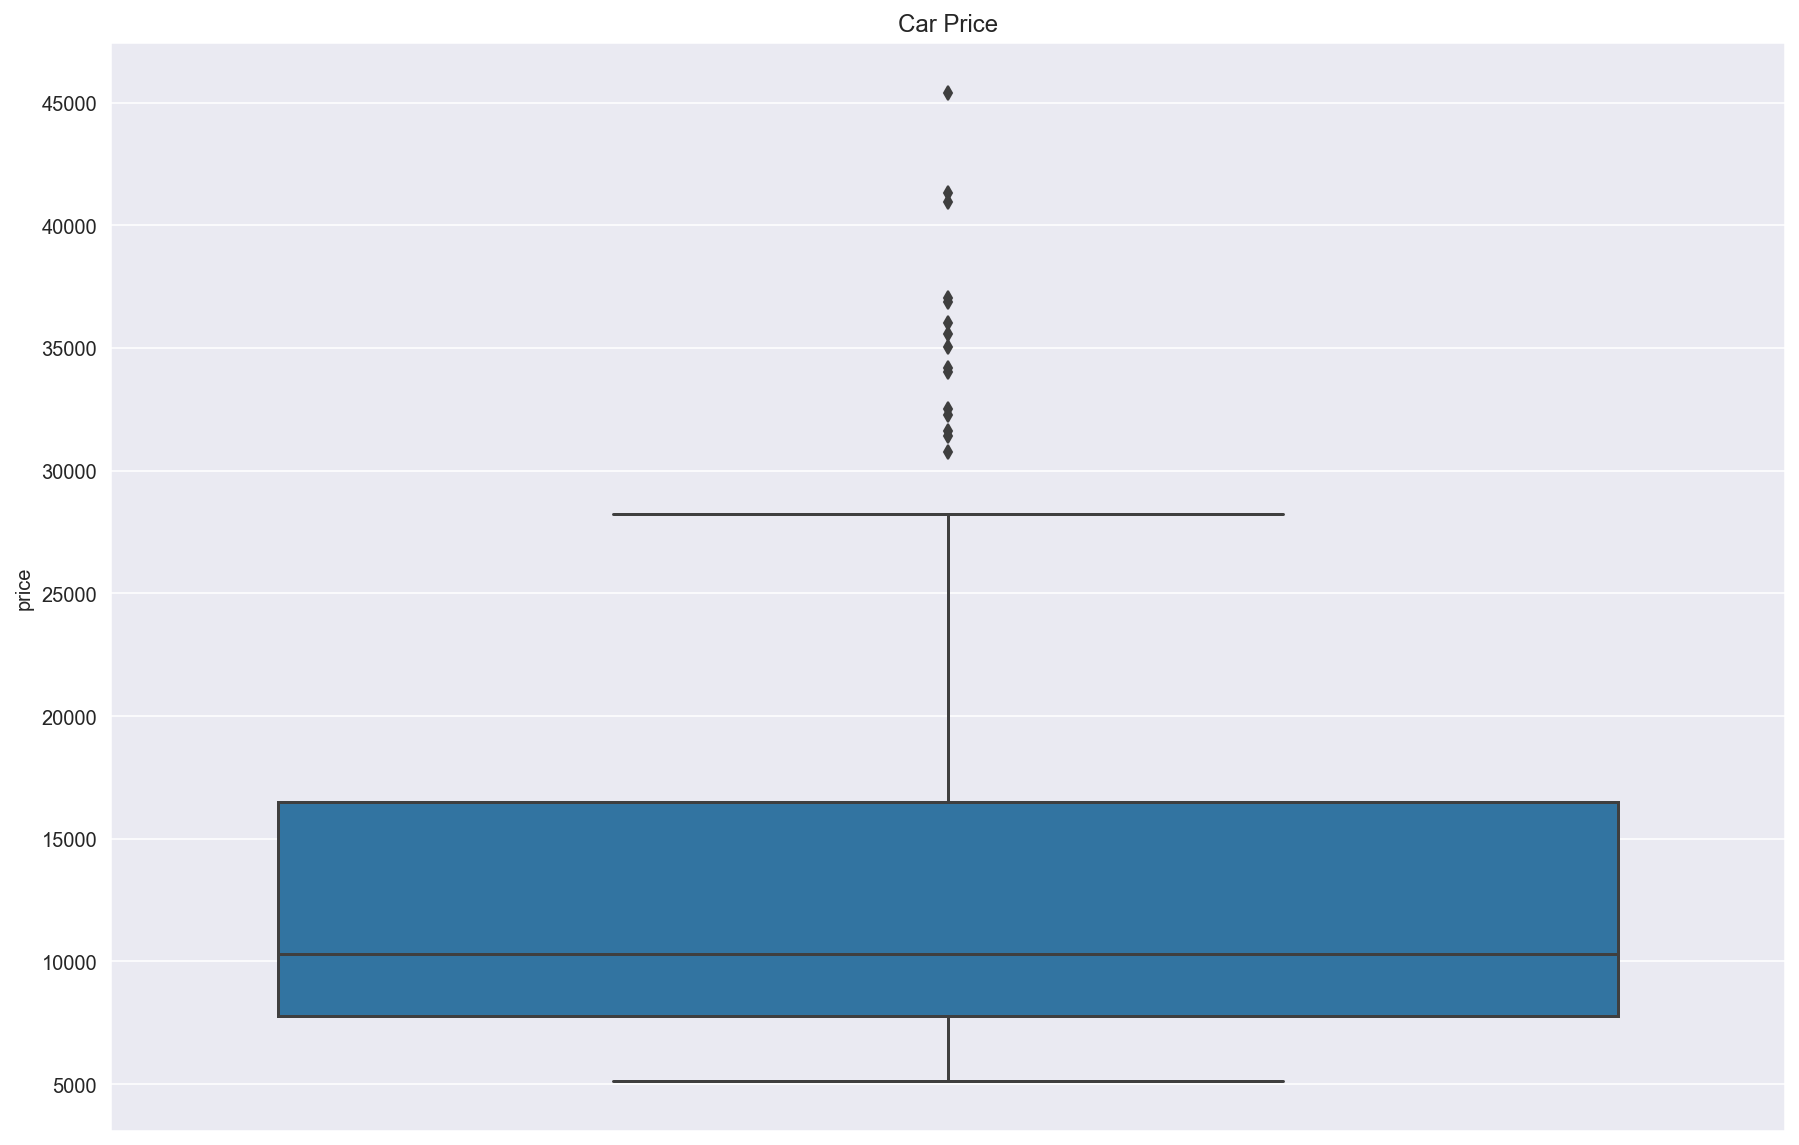

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


In [191]:
# Visualization of the target variable
plt.title('Car Price')
sns.boxplot(y=data.price)
plt.show()
print(data.price.describe())

The boxplot above shows the distribution of car prices with mean value of about 13000 dollars which is greater than median 10000, this implies the feature is skewed to the right. Reason why most of the car prices are around 15000 dollars.


C:\Users\cdzek\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


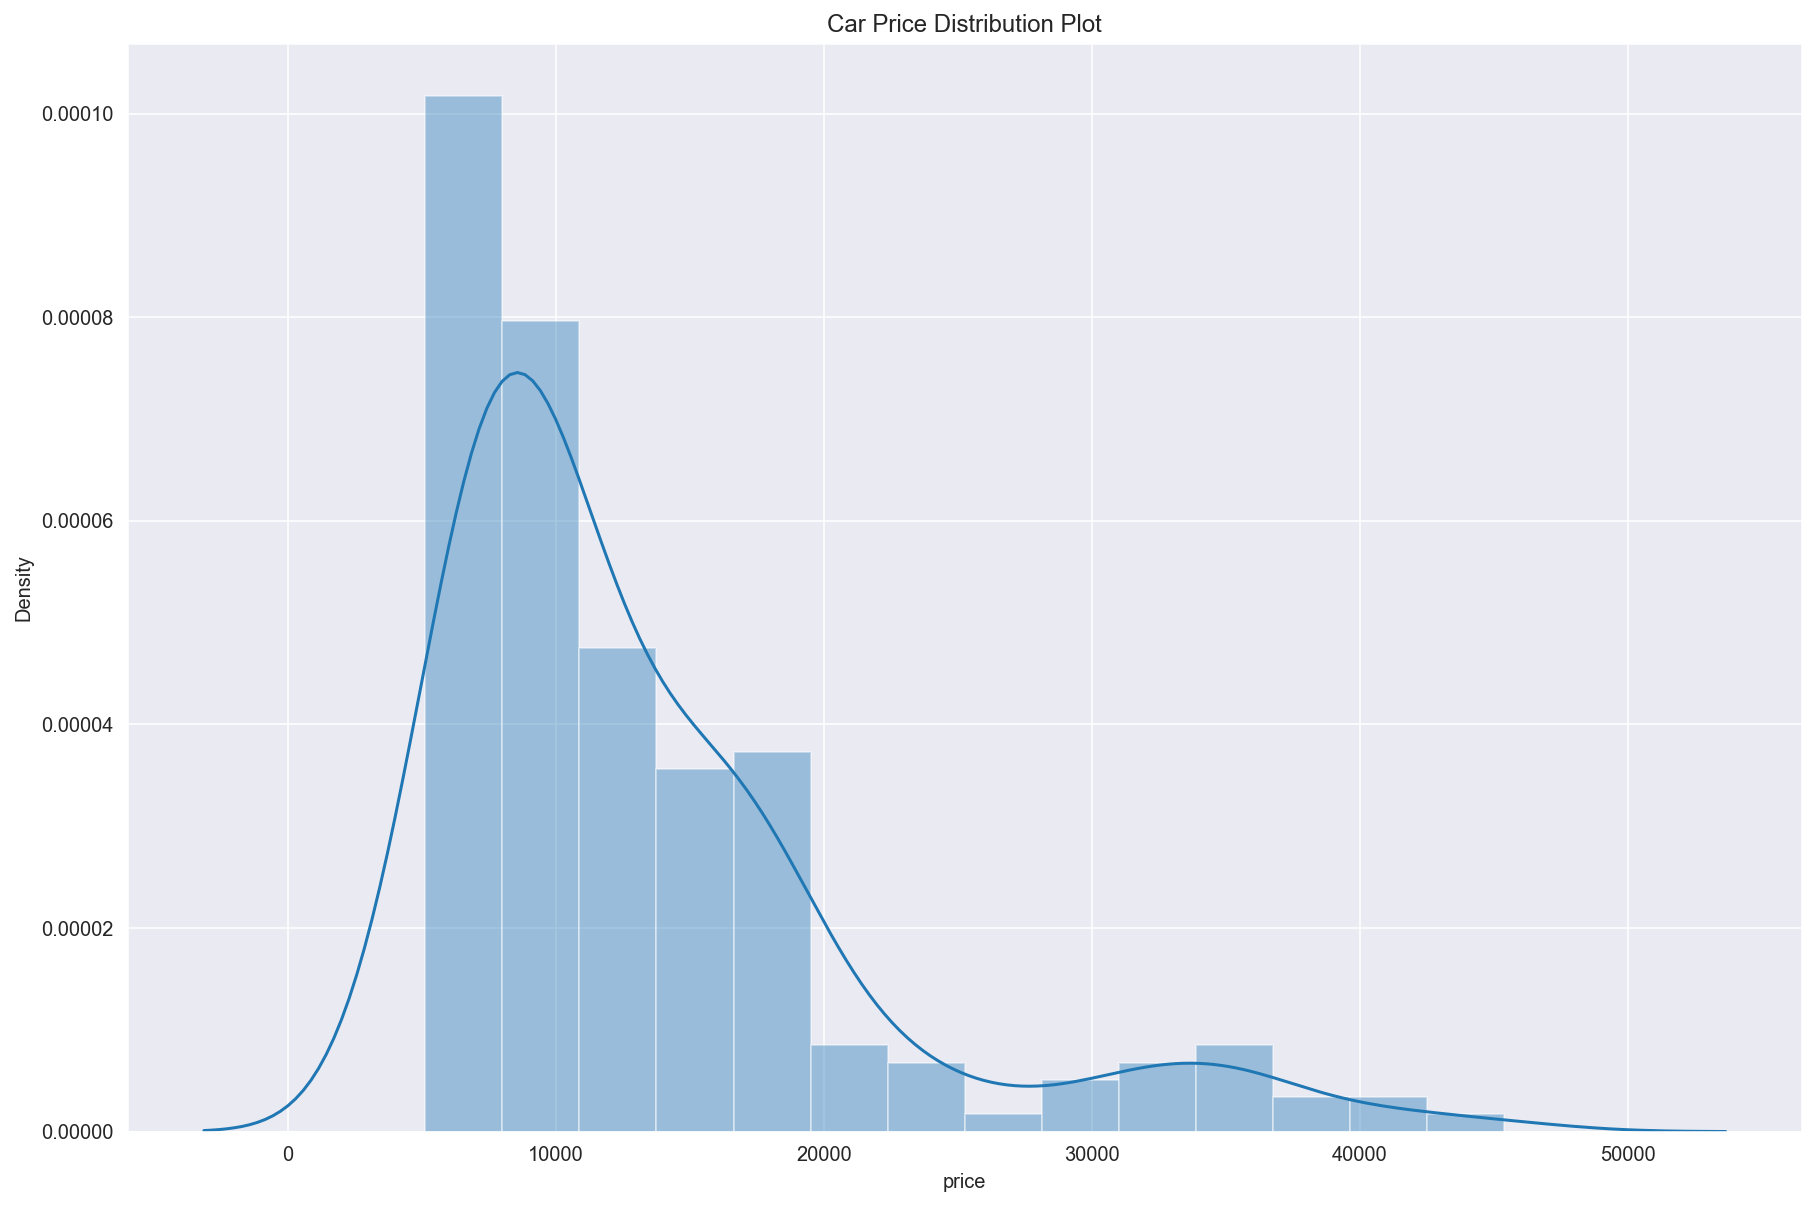

In [192]:
plt.title('Car Price Distribution Plot')
sns.distplot(data.price)
plt.show()

#### Measuring correlation coefficient of numerical features using Pearson Coefficient

Pearson correlation coefficient (r) is a way of measuring a linear correlation that shows strength and direction of the relationship between two variables. 

In [193]:
import scipy
from scipy.stats.stats import pearsonr

def pairplot(x_axis,y_axis) :
    sns.pairplot(data,x_vars=x_axis,y_vars=y_axis,height=4,aspect=1,kind="scatter")
    plt.show()

y_vars=['price']

 Correlation plot of Price vs wheelbase, curbweight and boreratio

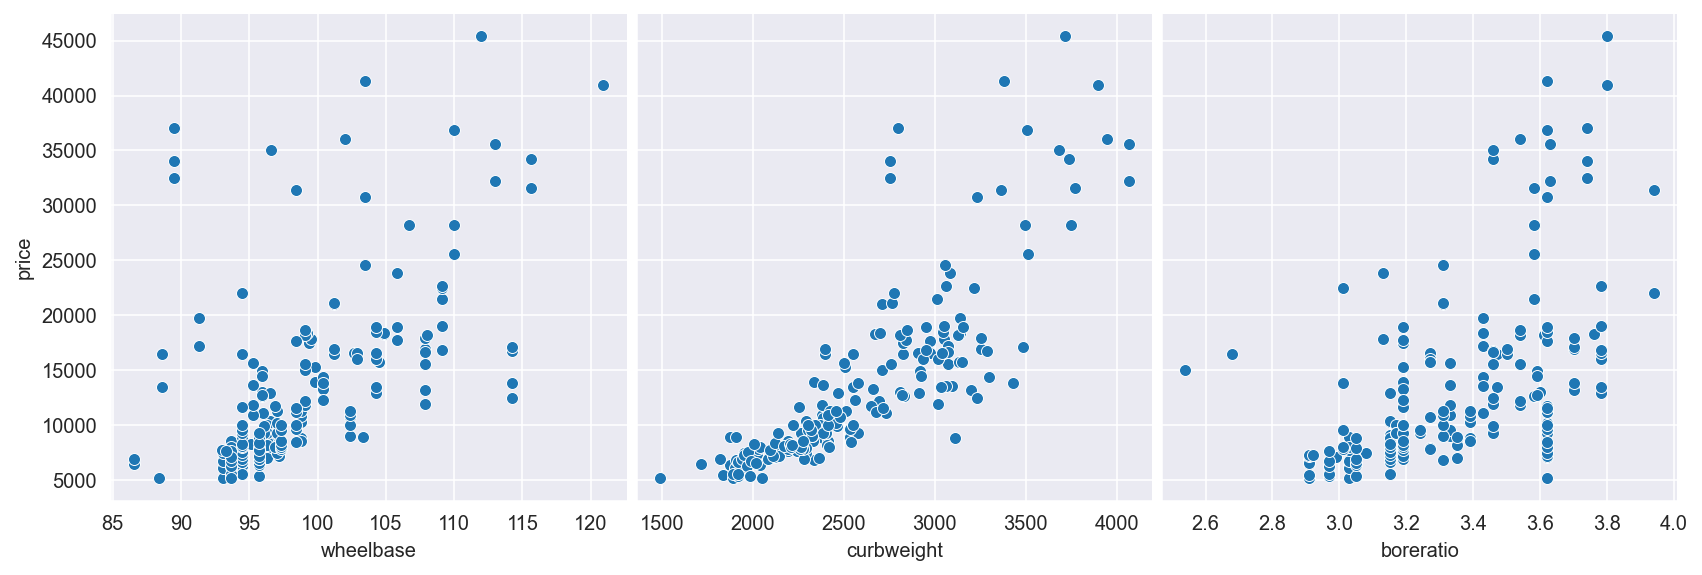

At first glance, the 3 variables are positively correlated but spread at higher values.

We can make sure of this by looking at the Coefficient of Correlation

Coefficient of Correlation between Price and wheelbase: 57.78155982921503 %

Coefficient of Correlation between Price and curbweight: 83.53048793372966 %

Coefficient of Correlation between Price and boreratio: 55.31732367984432 %


In [194]:
x_vars=['wheelbase','curbweight','boreratio']
pairplot(x_vars,y_vars)
print("At first glance, the 3 variables are positively correlated but spread at higher values.")

p1=data['wheelbase']
p2=data['curbweight']
p3=data['boreratio']

pearson_coeff, p_value = pearsonr(p1,data['price'])
print('\nWe can make sure of this by looking at the Coefficient of Correlation')
print('\nCoefficient of Correlation between Price and wheelbase:',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,data['price'])
print('\nCoefficient of Correlation between Price and curbweight:',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3,data['price'])
print('\nCoefficient of Correlation between Price and boreratio:',pearson_coeff*100,'%')


Correlation plot of Price vs Carlength, carwidth and carheight

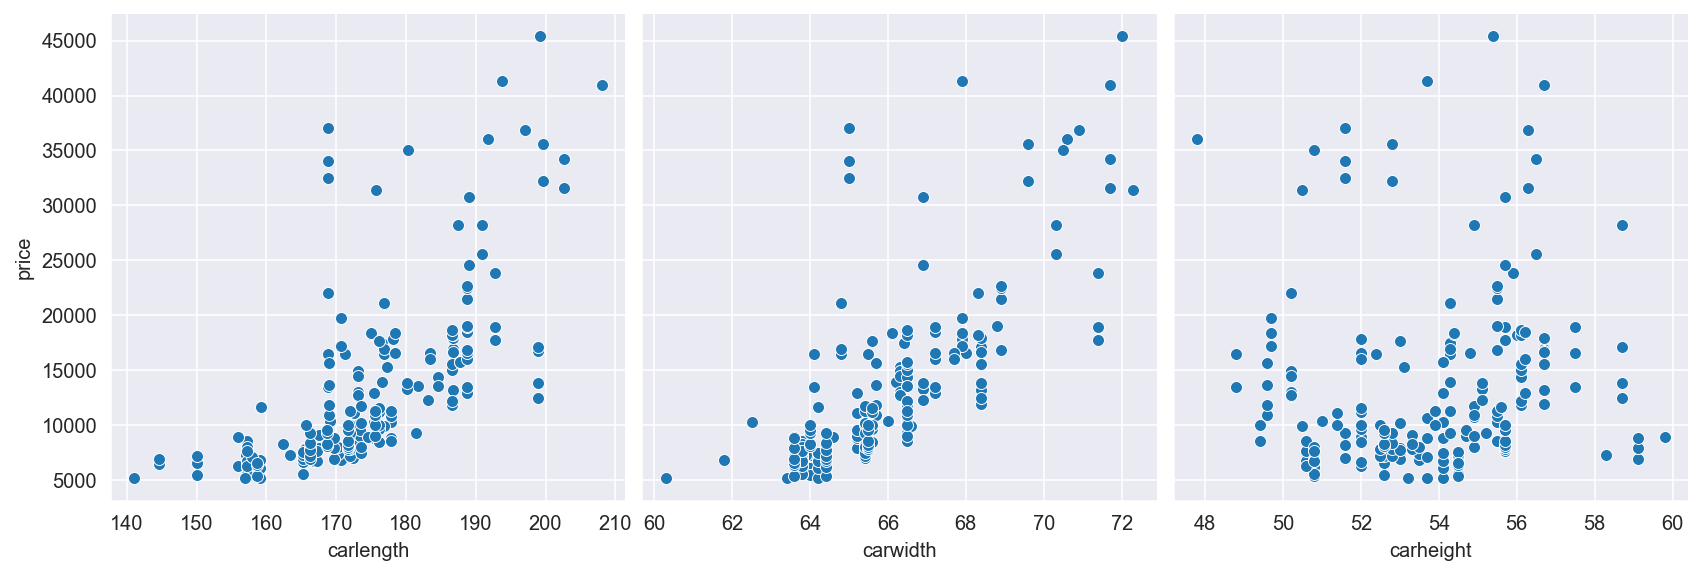

Carlength and Carwidth are more correlated than carheight which is more spread out but positive.

We can make sure of this by looking at the Coefficient of Correlation

Correlation coefficient between Price and carlength: 68.2920015677962 %
Correlation coefficient between Price and carwidth:  75.93252997415117 %
Correlation coefficient between Price and carheight:  11.933622657049444 %


In [195]:
x_vars=['carlength','carwidth', 'carheight']
pairplot(x_vars,y_vars)
print("Carlength and Carwidth are more correlated than carheight which is more spread out but positive.")

p1=data['carlength']
p2=data['carwidth']
p3=data['carheight']

pearson_coeff, p_value = pearsonr(p1,data['price'])
print('\nWe can make sure of this by looking at the Coefficient of Correlation')
print('\nCorrelation coefficient between Price and carlength:',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,data['price'])
print('Correlation coefficient between Price and carwidth: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3,data['price'])
print('Correlation coefficient between Price and carheight: ',pearson_coeff*100,'%')

Correlation plot of Price vs Enginesize, horsepower and stroke

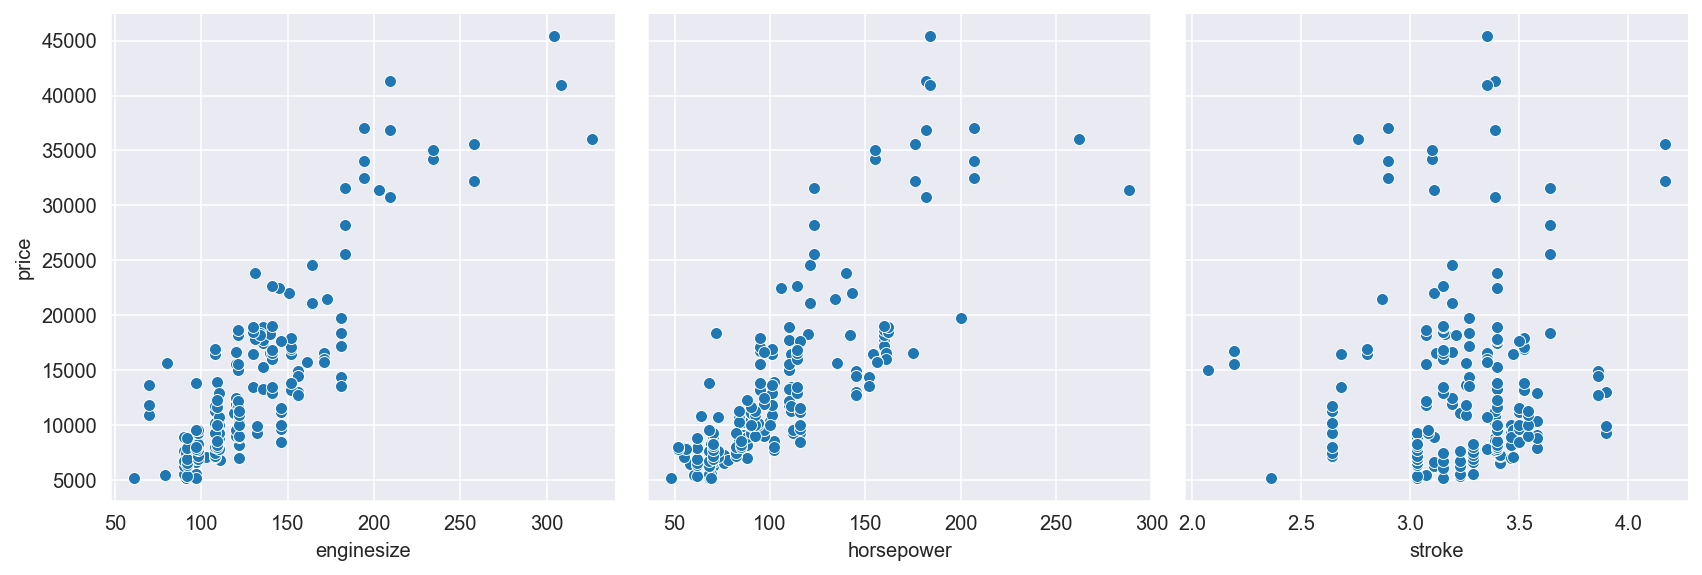

Enginesize and Horsepower are positively correlated, but Stroke is more spread out (may not be related).

We can make sure of this by looking at the Coefficient of Correlation

Correlation coefficient between Price and enginesize:  87.41448025245117 %
Correlation coefficient between Price and horsepower:  80.8138822536222 %
Correlation coefficient between Price and stroke:  7.944308388193101 %


In [196]:
x_vars=['enginesize','horsepower','stroke']
pairplot(x_vars,y_vars)
print("Enginesize and Horsepower are positively correlated, but Stroke is more spread out (may not be related).")

p1=data['enginesize']
p2=data['horsepower']
p3=data['stroke']

pearson_coeff, p_value = pearsonr(p1,data['price'])
print('\nWe can make sure of this by looking at the Coefficient of Correlation')
print('\nCorrelation coefficient between Price and enginesize: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,data['price'])
print('Correlation coefficient between Price and horsepower: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3,data['price'])
print('Correlation coefficient between Price and stroke: ',pearson_coeff*100,'%')

Correlation plot of Price vs compressionratio, peakrpm and symboling

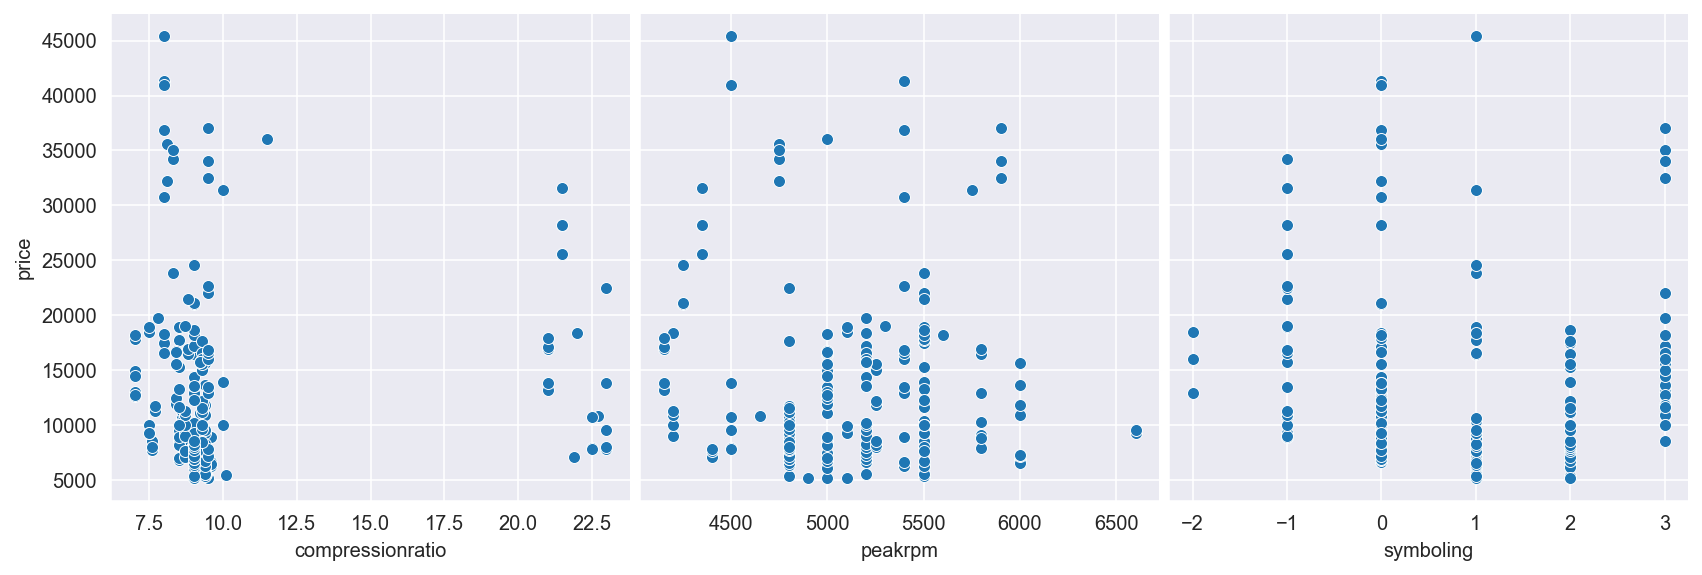

Compressionratio, Peakrpm and symboling are not correlated.

We can make sure of this by looking at the Coefficient of Correlation

Correlation coefficient between Price and compressionratio:  6.7983505799442705 %
Correlation coefficient between Price and peakrpm:  -8.52671502778568 %
Correlation coefficient between Price and symboling:  -7.997822464270346 %


In [197]:
x_vars=['compressionratio','peakrpm',"symboling"]
pairplot(x_vars,y_vars)
print("Compressionratio, Peakrpm and symboling are not correlated.")

p1=data['compressionratio']
p2=data['peakrpm']
p3=data['symboling']

pearson_coeff, p_value = pearsonr(p1,data['price'])
print('\nWe can make sure of this by looking at the Coefficient of Correlation')
print('\nCorrelation coefficient between Price and compressionratio: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,data['price'])
print('Correlation coefficient between Price and peakrpm: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3,data['price'])
print('Correlation coefficient between Price and symboling: ',pearson_coeff*100,'%')

Correlation plot of Price vs Citympg, highwaympg

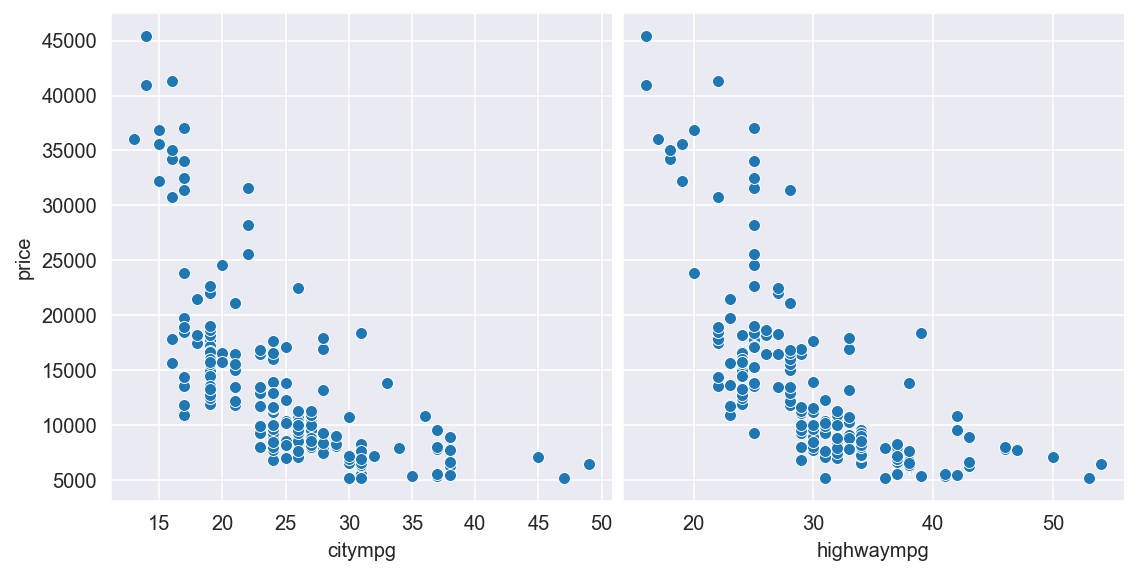

Citympg & Highwaympg are negatively correlated.
The more prices get lower, the higher the distances get, which means that the cheapest cars have better mileage than expensive cars.

We can make sure of this by looking at the Coefficient of Correlation

Correlation coefficient between Price and citympg:  -68.57513360270401 %
Correlation coefficient between Price and highwaympg:  -69.75990916465562 %


In [198]:
x_vars=['citympg', 'highwaympg']
pairplot(x_vars,y_vars)
print('Citympg & Highwaympg are negatively correlated.\nThe more prices get lower, the higher the distances get, which means that the cheapest cars have better mileage than expensive cars.')

p1=data['citympg']
p2=data['highwaympg']

pearson_coeff, p_value = pearsonr(p1,data['price'])
print('\nWe can make sure of this by looking at the Coefficient of Correlation')
print('\nCorrelation coefficient between Price and citympg: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,data['price'])
print('Correlation coefficient between Price and highwaympg: ',pearson_coeff*100,'%')

### Conclusion

- Positively correlated variables with Price: wheelbase, carlenght, carwidth, curbweight, enginesize, boreratio, horesepower

- Negatively correlated variables with Price: citympg, highwaympg  

These variables should be kept for a better model performance, and the other variables should be ignored as they are not correlated with Price

#### Checking the multicollinearity between the correlated independent variables above and Price

In [199]:
def heatmap(dataframe):
    sns.heatmap(dataframe.corr(),cmap="OrRd",annot=True)
    plt.show()

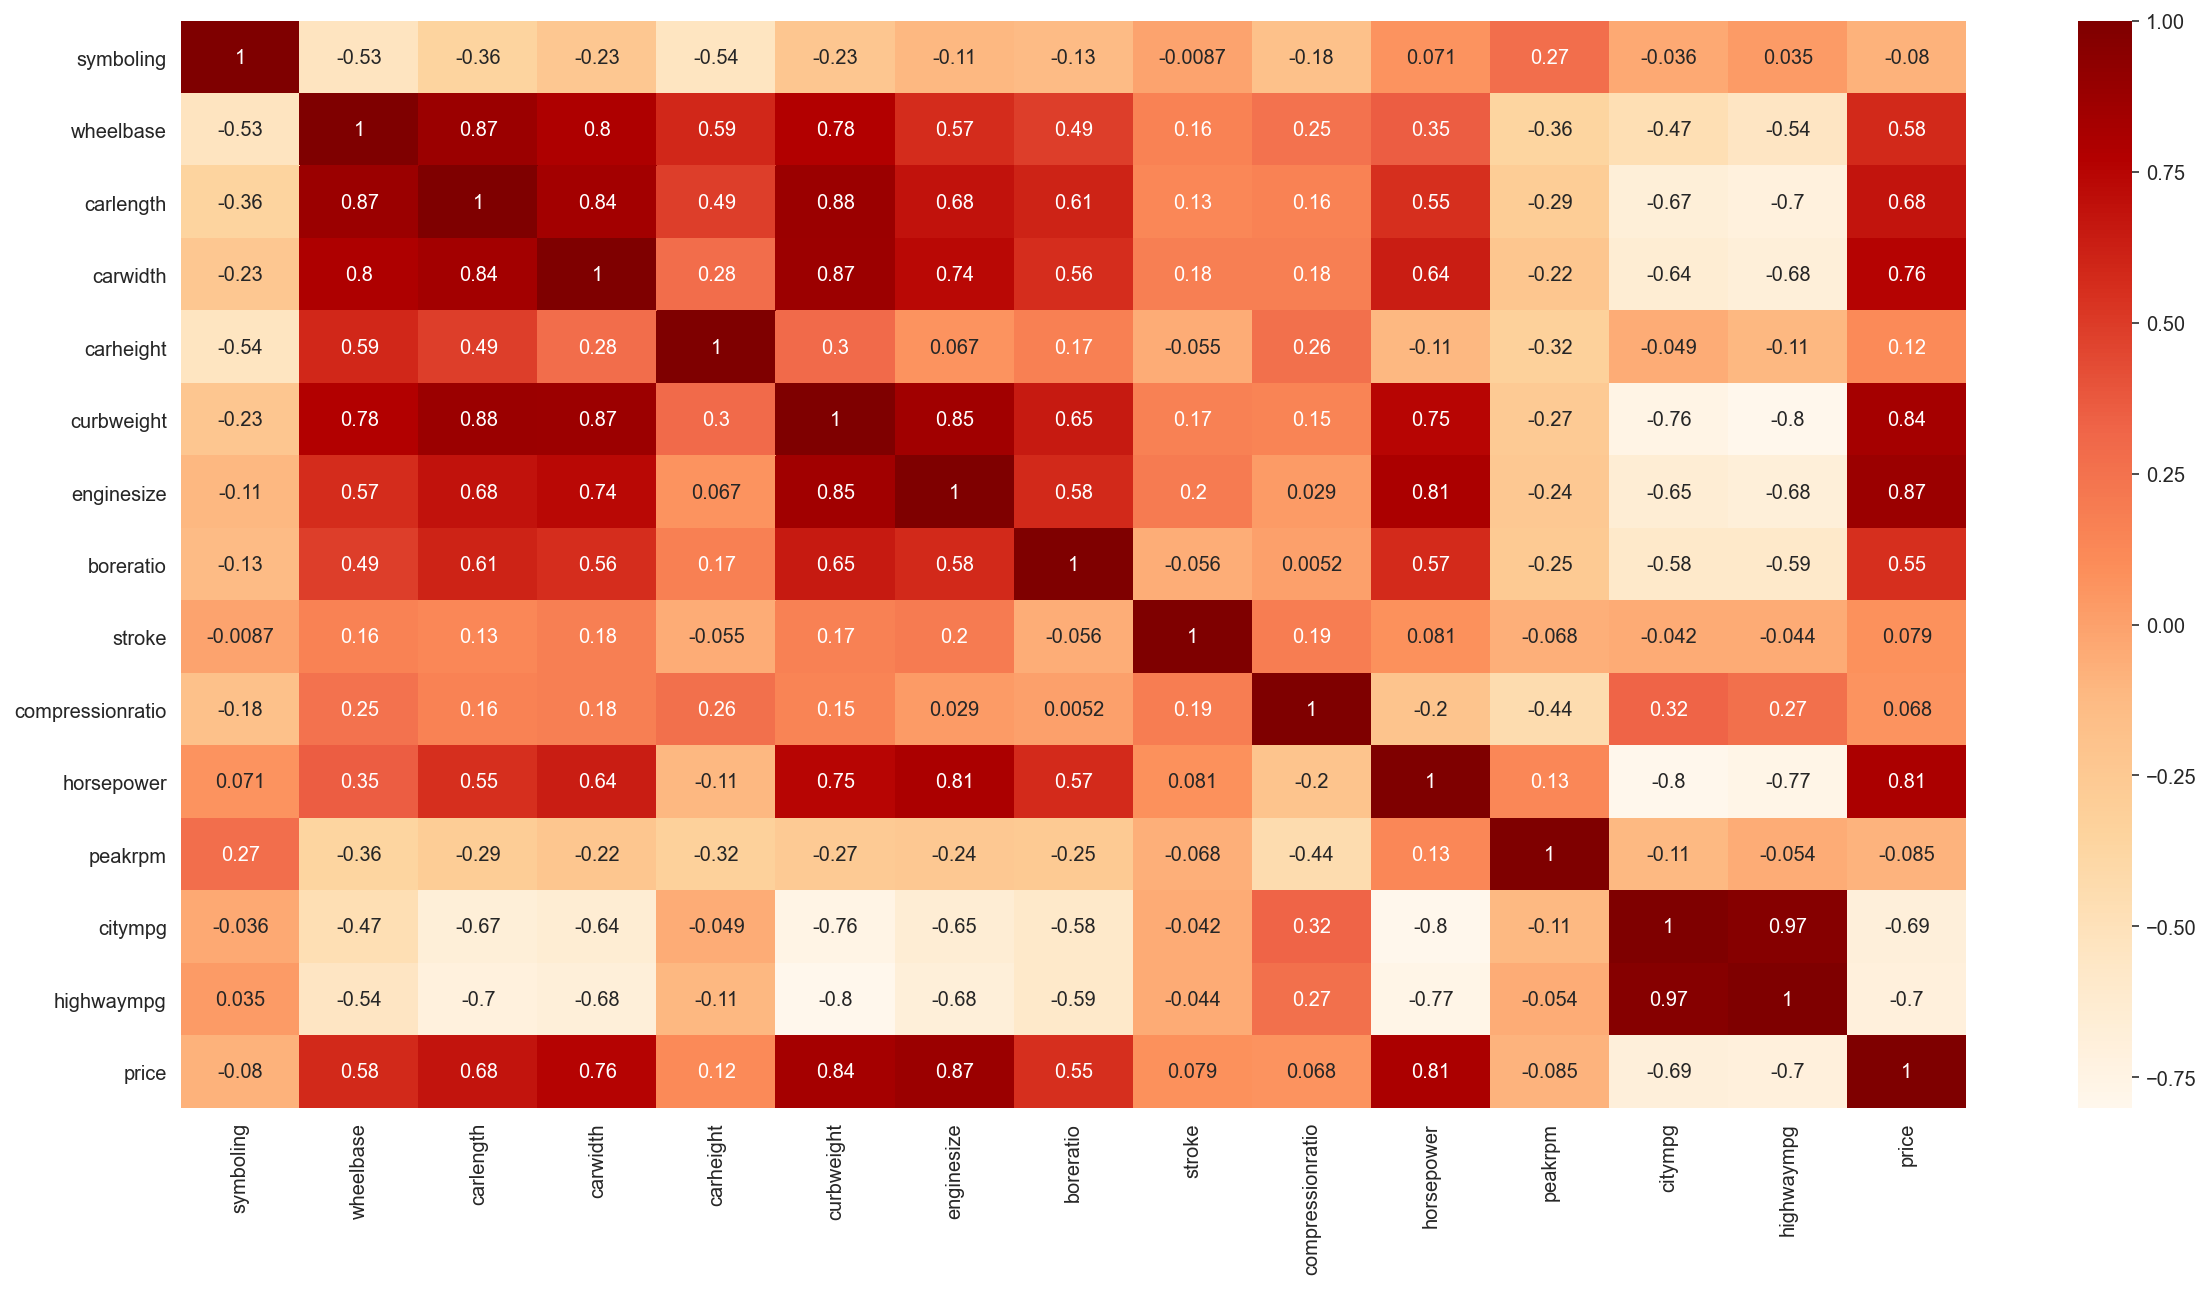

In [200]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
heatmap(data)

##### Further analysis of the correlation between the variables specific to the dimensions of a car

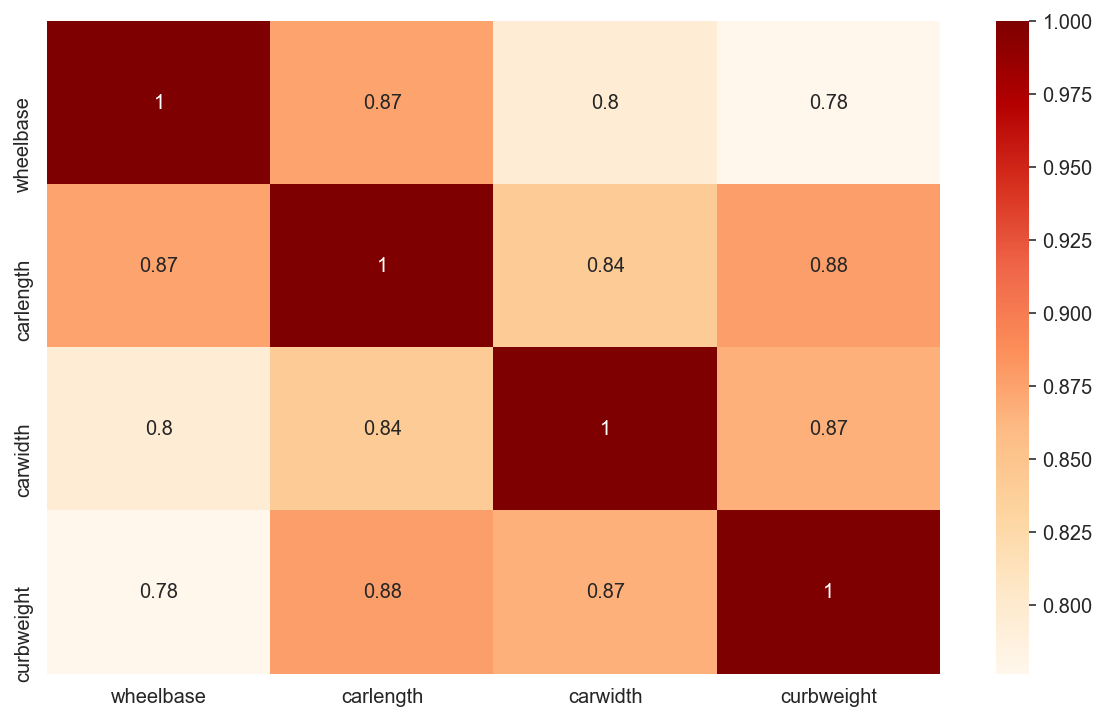

In [201]:
dimension_col_list = ['wheelbase', 'carlength', 'carwidth','curbweight']
plt.rcParams['figure.figsize'] = (10.0, 6.0)
heatmap(data.filter(dimension_col_list))

Wheelbase , carlength, carwidth and curbweight are all correlated to each other thus only one of them will be used.

#### Further analysis of the correlation between the variables specific to the performance of a car

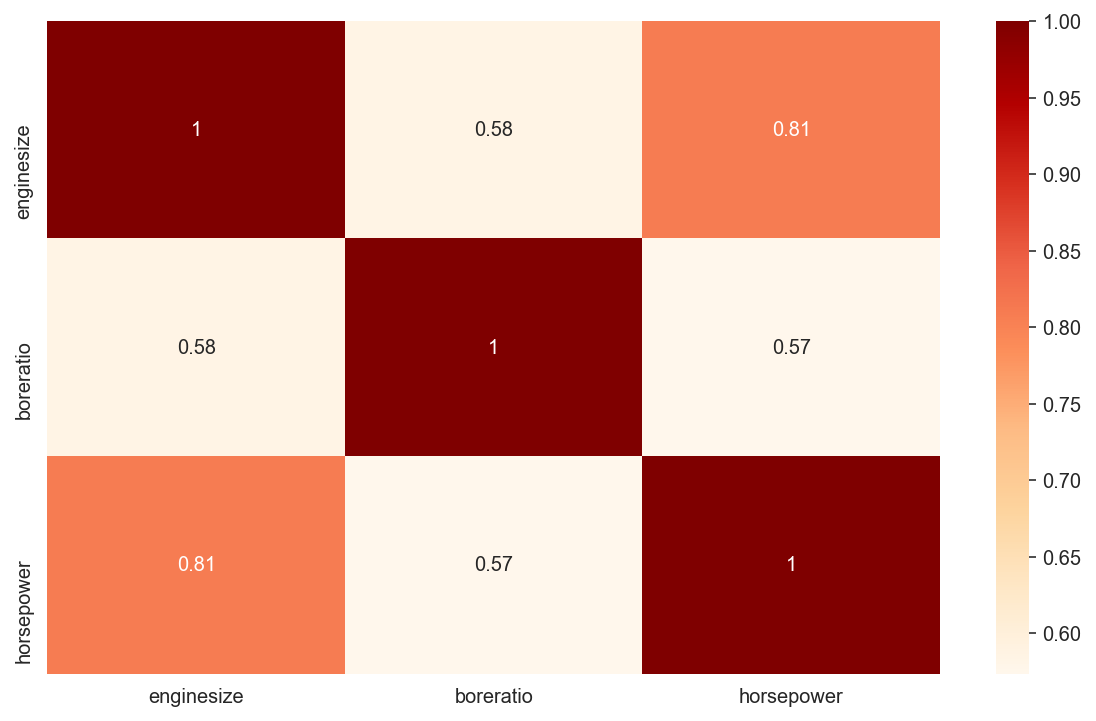

In [202]:
performance_col_list = ['enginesize','boreratio','horsepower']
heatmap(data.filter(performance_col_list))

This shows that horsepower and enginesize are highly correlatted thus just one of them will be used.

#### Further analysis of the correlation between citympg and highwaympg

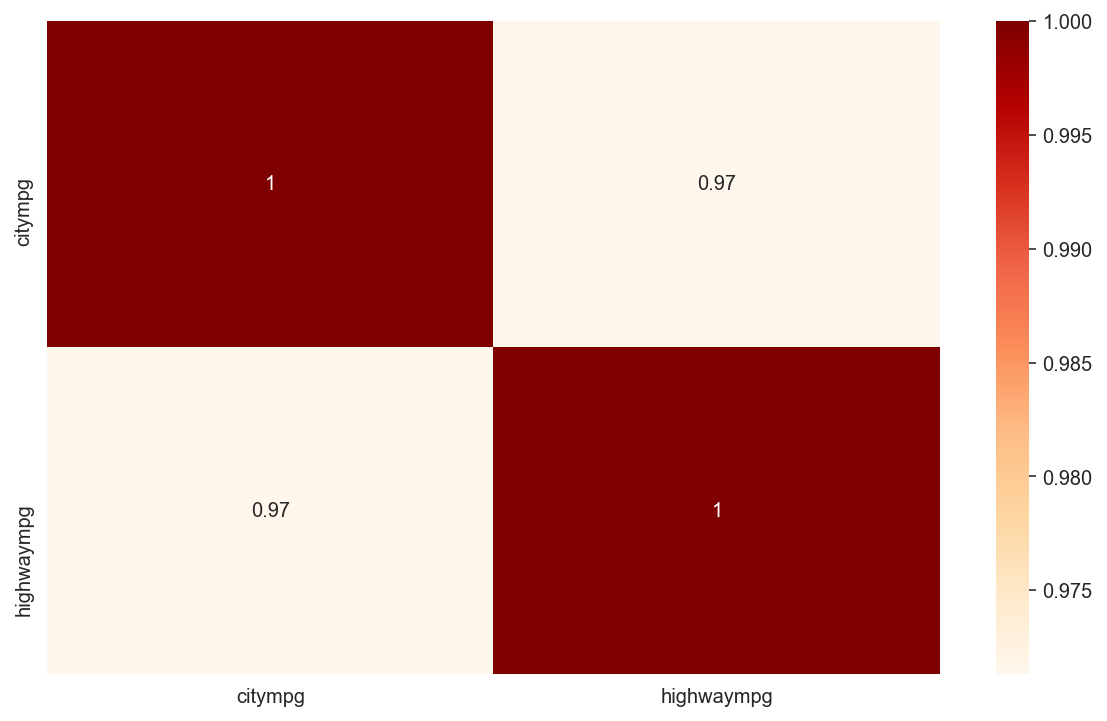

In [203]:
performance_col_list = ['citympg','highwaympg']
heatmap(data.filter(performance_col_list))

This shows that there is a high correlation between citympg and highwaympg thus only one of them will be used.

### Categorical variables 

Price vs Company Name

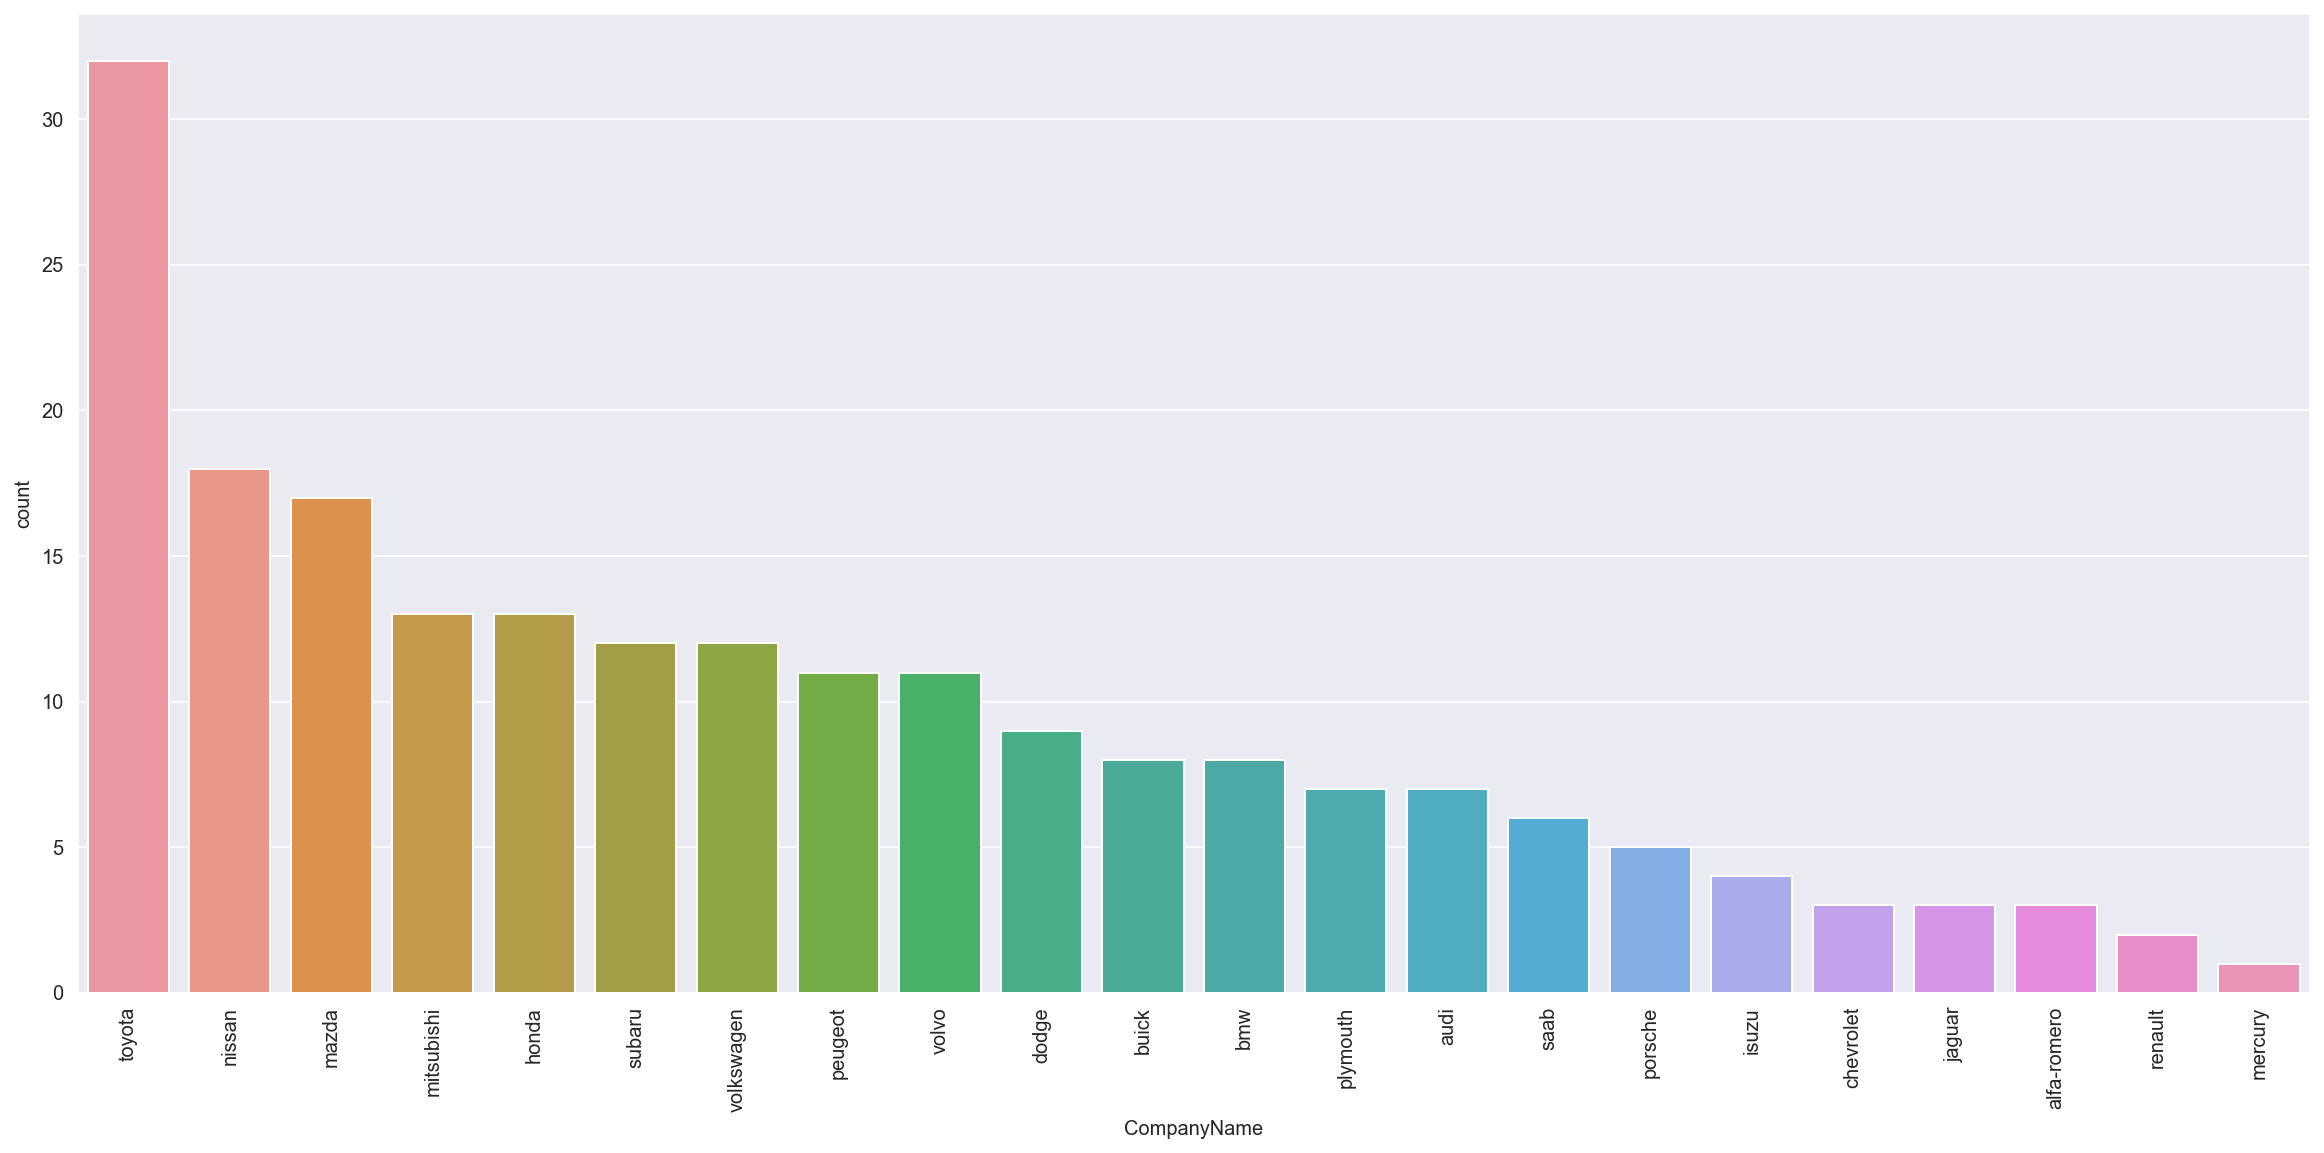

In [204]:
plt.figure(figsize=(20,9))

plt.xticks(rotation = 90)
order = data['CompanyName'].value_counts(ascending=False).index
sns.countplot(x='CompanyName', data=data, order=order)

plt.show()

The Histogram above shows shows the company name with highest sales which is Toyota followed by Nissan and Mazda.

Price vs fueltype

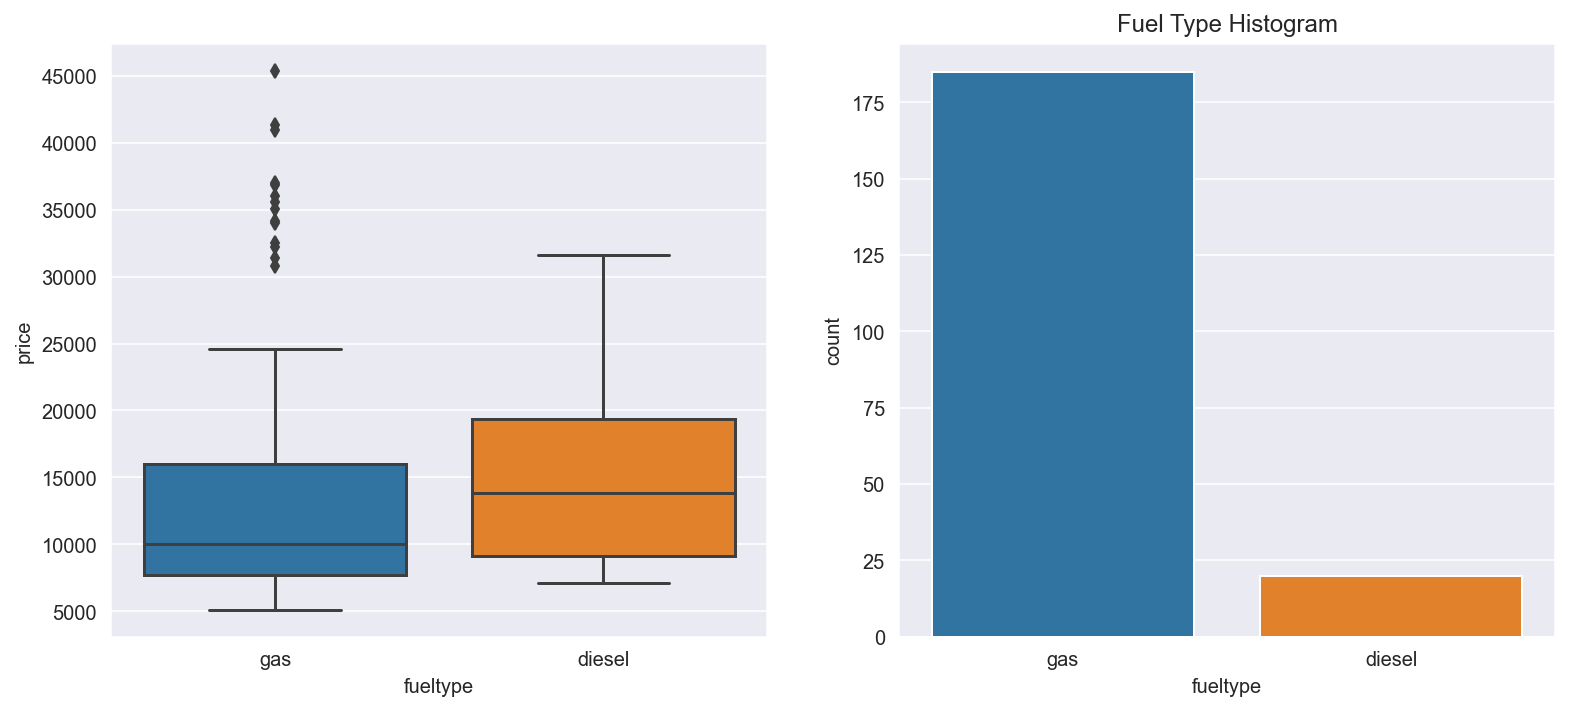

In [205]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = data)

plt.subplot(2,3,2)
plt.title('Fuel Type Histogram')
order = data['fueltype'].value_counts(ascending=False).index
sns.countplot(x='fueltype', data=data, order=order)

plt.show()

The Histogram above shows the most consumed fuel type by car owners with gas being the most used since the cars needed for this oil type are way cheaper than those for diesel.  
Surprisingly the most expensive cars are still those that need gas as shown on the boxplot with prices getting upto 45000 dollars 

Price vs Aspiration

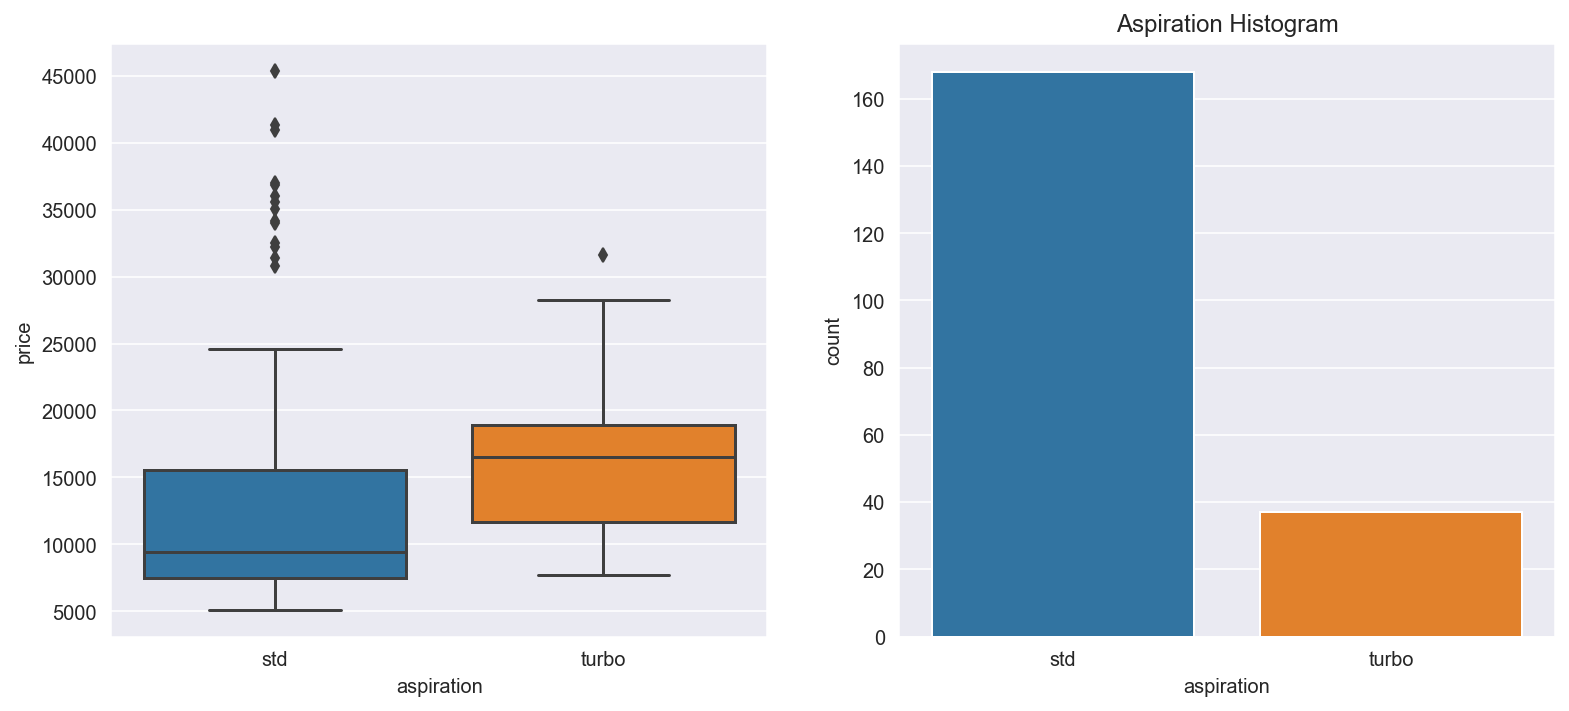

In [206]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'aspiration', y = 'price', data = data)

plt.subplot(2,3,2)
plt.title('Aspiration Histogram')
order = data['aspiration'].value_counts(ascending=False).index
sns.countplot(x='aspiration', data=data, order=order)

plt.show()

Most cheapers cars use naturally aspirated engines with outliers of most expensive cars also using it whereas turbocharger which makes the engine more efficient is mostly in the expensive cars and less bought by users.

Price vs doornumber

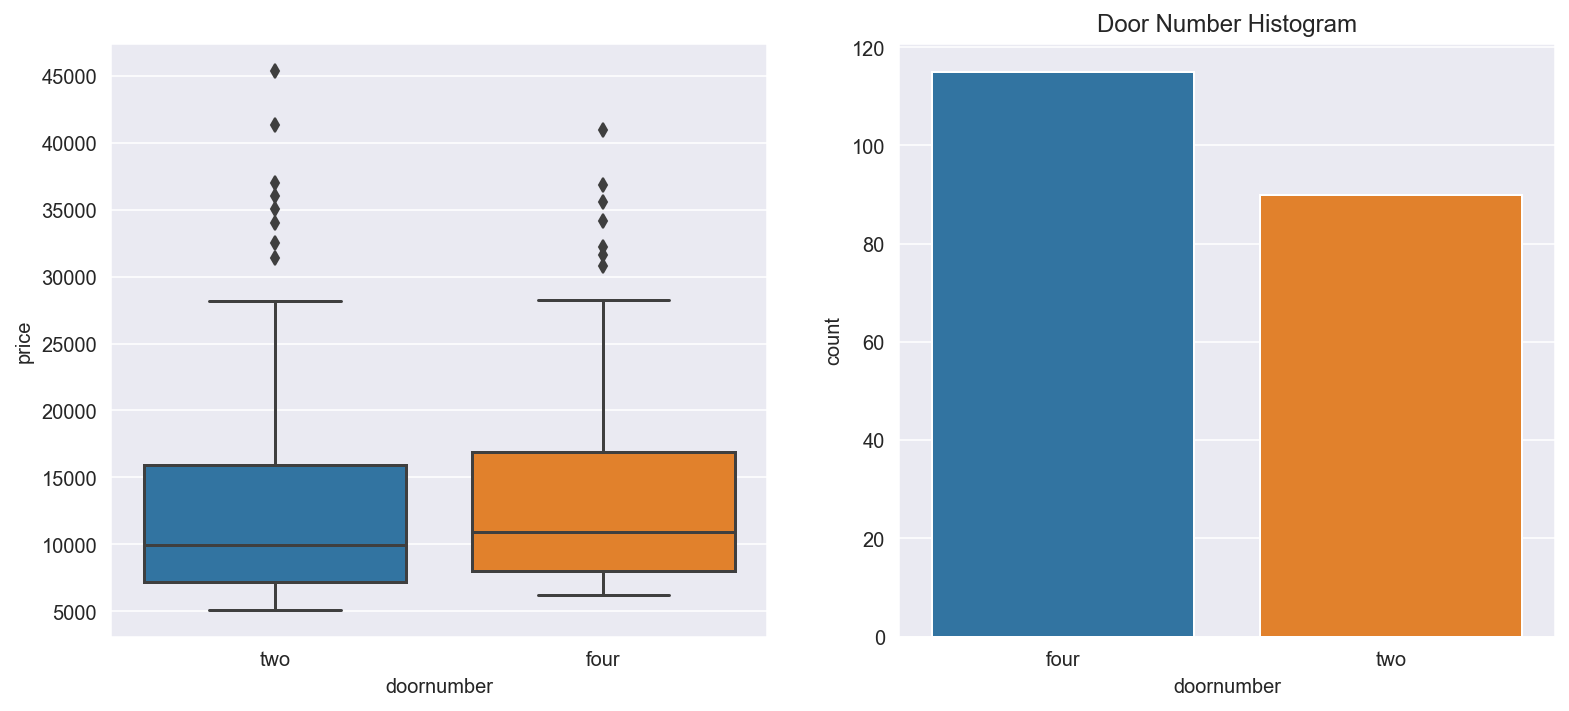

In [207]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = data)

plt.subplot(2,3,2)
plt.title('Door Number Histogram')
order = data['doornumber'].value_counts(ascending=False).index
sns.countplot(x='doornumber', data=data, order=order)

plt.show()

Car door numbers of 2 and 4 are almost equally distributed which shows that price is not affected by this feature.

Price vs enginelocation

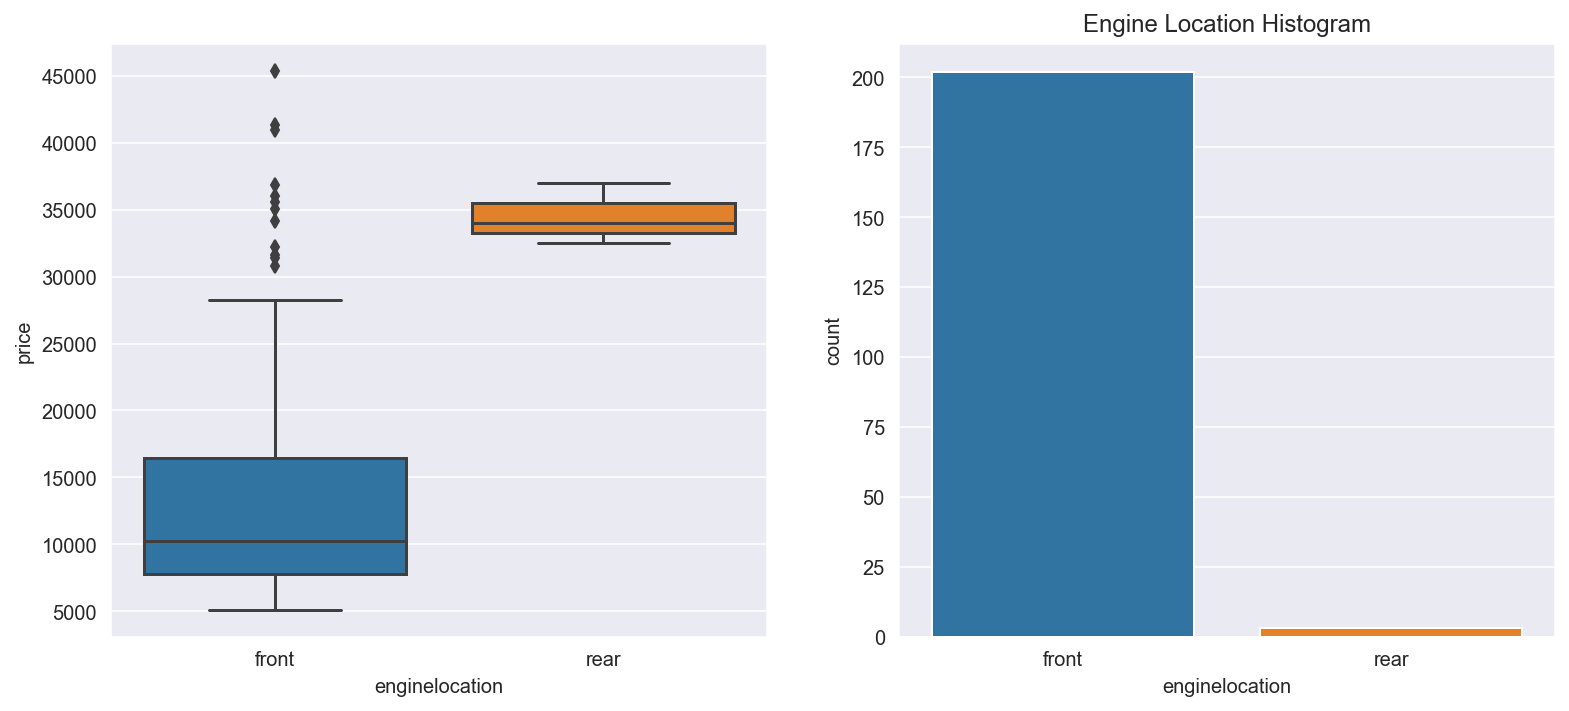

In [208]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'enginelocation', y = 'price', data = data)

plt.subplot(2,3,2)
plt.title('Engine Location Histogram')
order = data['enginelocation'].value_counts(ascending=False).index
sns.countplot(x='enginelocation', data=data, order=order)

plt.show()

A huge percentage of cars bought have their engines at the front with a very small proportion having the rear engines and these cars with rear engines are very expensive with a price range of 32000 dollars to 37000 dollars.

Price vs carbody

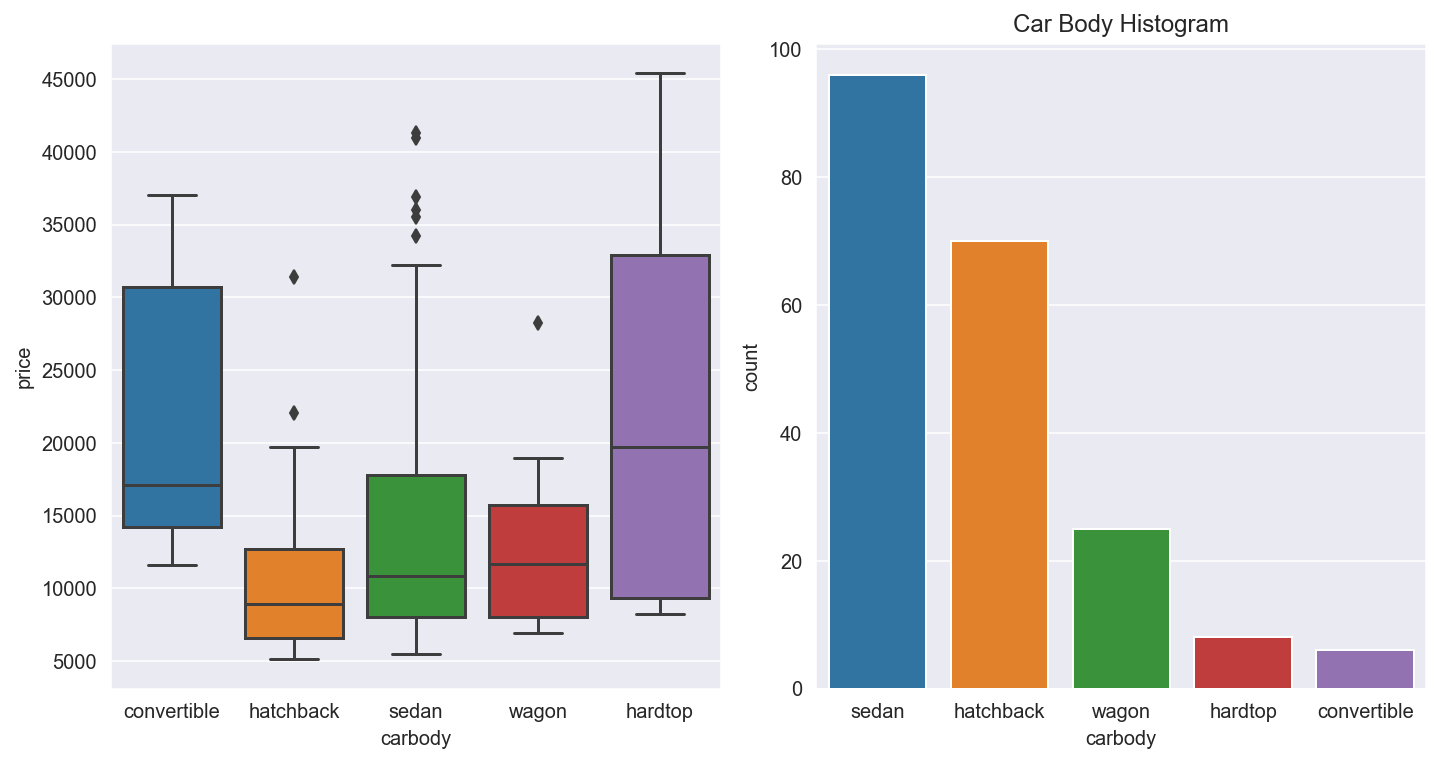

In [209]:
plt.rcParams["figure.figsize"] = (15,10)
plt.subplot(2,3,1)
sns.boxplot(x='carbody',y='price',data = data)

plt.subplot(2,3,2)
plt.title('Car Body Histogram')
order = data['carbody'].value_counts(ascending=False).index
sns.countplot(x='carbody', data=data, order=order)
plt.tight_layout()
plt.show()

The histogram above shows the different car bodies type most of the cars bought has with Sedan being the most common followed by hetchback.

Price vs Fuelsystem

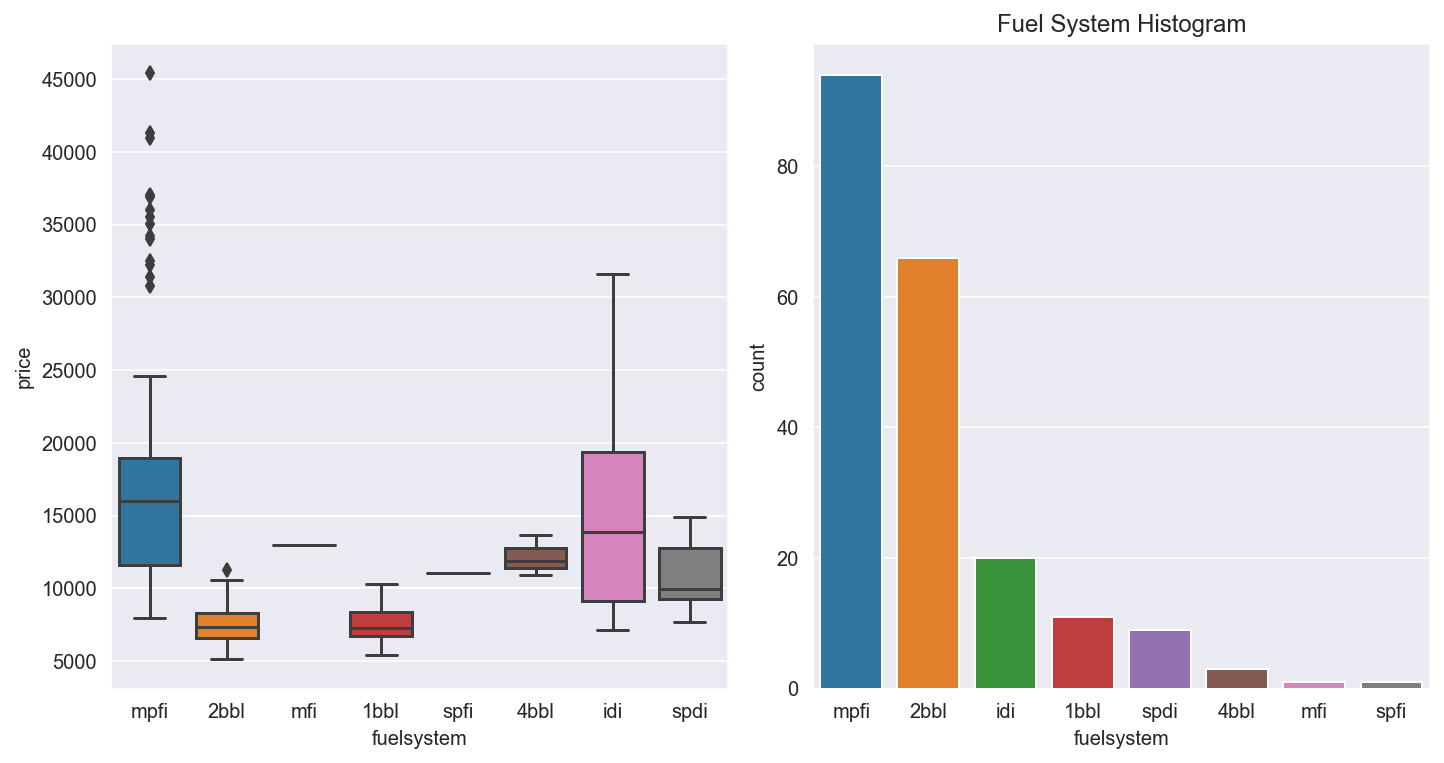

In [210]:
plt.subplot(2,3,1)
sns.boxplot(x='fuelsystem',y='price',data = data)

plt.subplot(2,3,2)
plt.title('Fuel System Histogram')
order = data['fuelsystem'].value_counts(ascending=False).index
sns.countplot(x='fuelsystem', data=data, order=order)
plt.tight_layout()
plt.show()

mpfi is the most used fuel system though it has the highest average car price consumers still prefer it.

Price vs enginetype

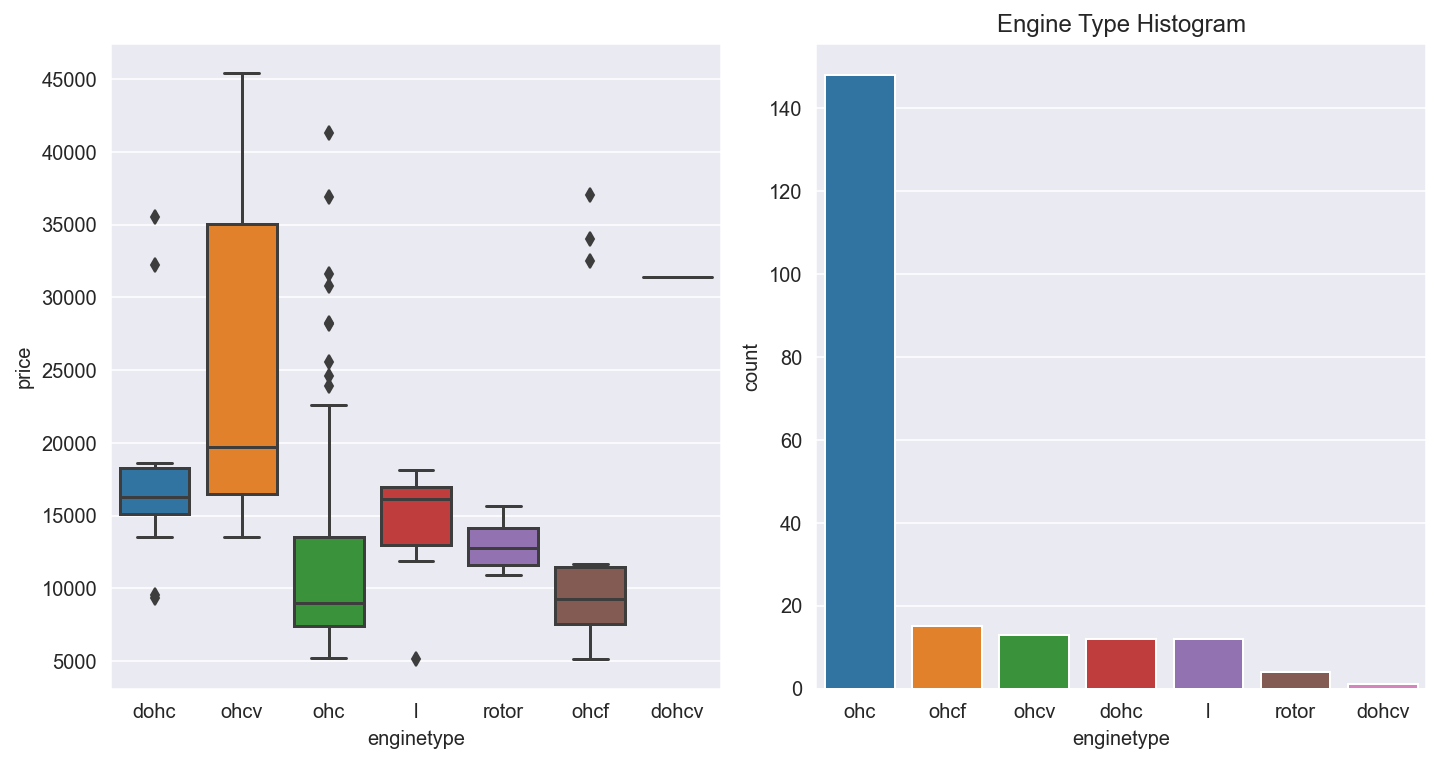

In [211]:
plt.subplot(2,3,1)
sns.boxplot(x='enginetype',y='price',data = data)

plt.subplot(2,3,2)
plt.title('Engine Type Histogram')
order = data['enginetype'].value_counts(ascending=False).index
sns.countplot(x='enginetype', data=data, order=order)
plt.tight_layout()
plt.show()

ohc has the highest average car price and is also the most common engine type.

Price vs cylindernumber

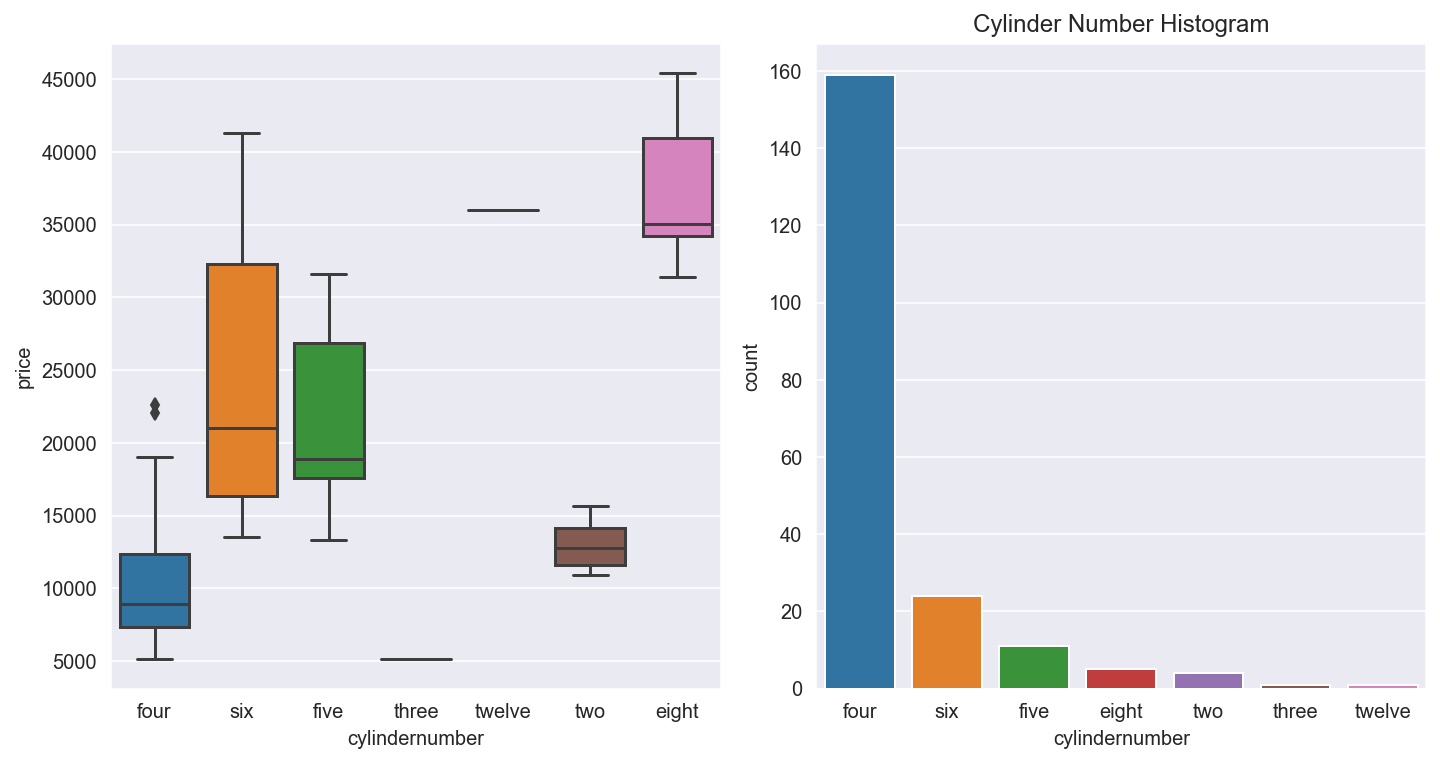

In [212]:
#Price vs cylindernumber
plt.subplot(2,3,1)
sns.boxplot(x='cylindernumber',y='price',data = data)

plt.subplot(2,3,2)
plt.title('Cylinder Number Histogram')
order = data['cylindernumber'].value_counts(ascending=False).index
sns.countplot(x='cylindernumber', data=data, order=order)
plt.tight_layout()
plt.show()

Four cylinders are the most common with corresponding car prices being the cheapest. 

Price vs drivewheel

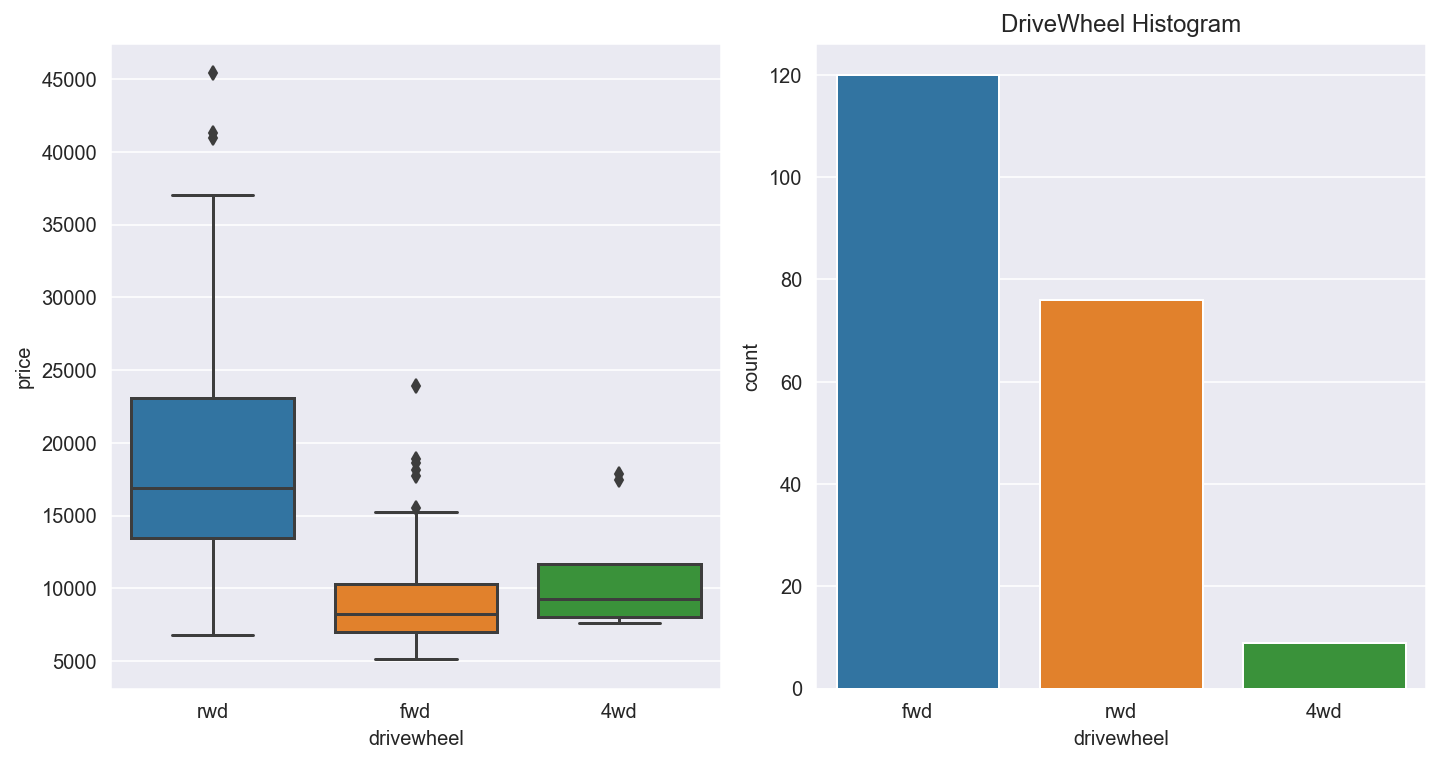

In [213]:
plt.subplot(2,3,1)
sns.boxplot(x = 'drivewheel', y = 'price', data = data)

plt.subplot(2,3,2)
plt.title('DriveWheel Histogram')
order = data['drivewheel'].value_counts(ascending=False).index
sns.countplot(x='drivewheel', data=data, order=order)
plt.tight_layout()
plt.show()

rwd is the most common drive wheel in the cars though the car prices for this wheel type are the highest

Price vs symboling

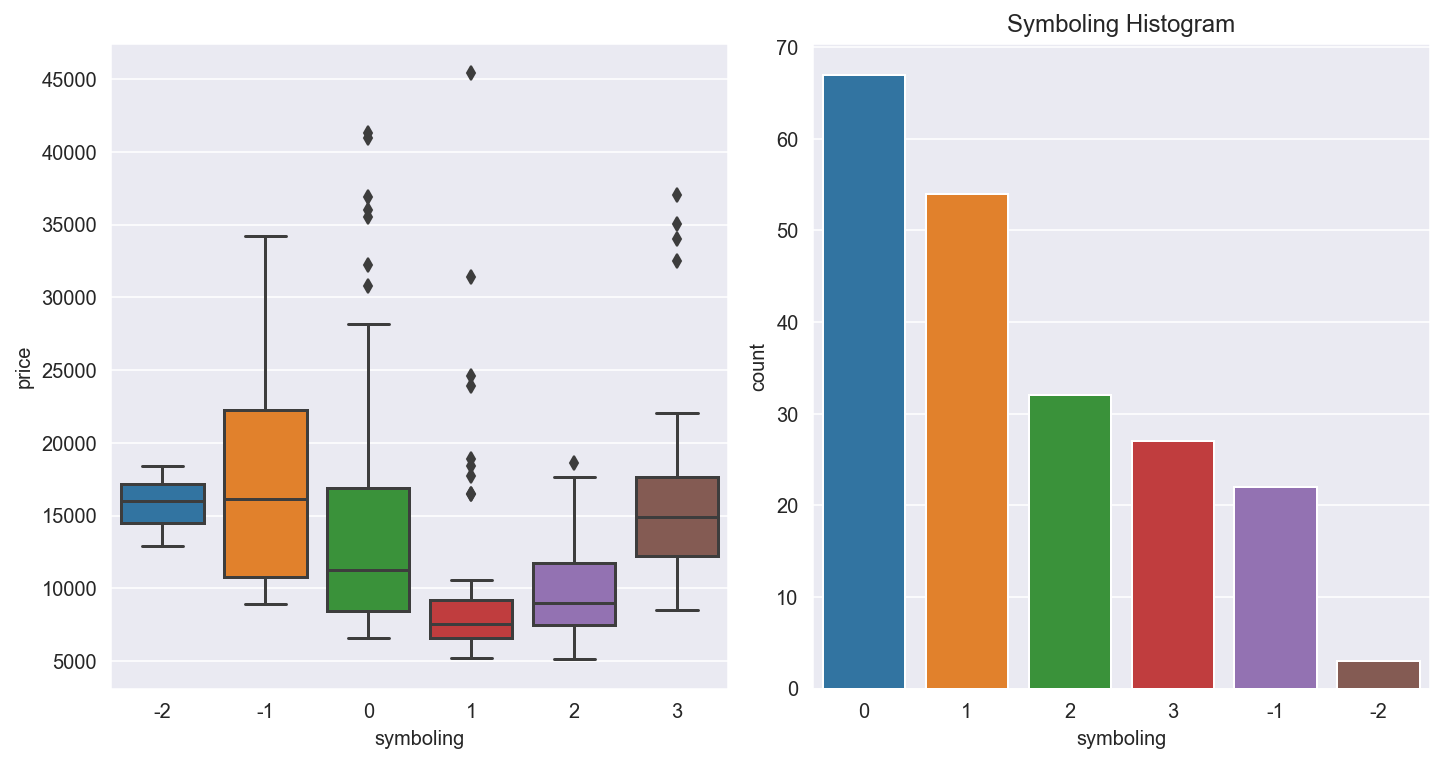

In [214]:
plt.subplot(2,3,1)
sns.boxplot(x=data.symboling, y=data.price)


plt.subplot(2,3,2)
plt.title('Symboling Histogram')
order = data['symboling'].value_counts(ascending=False).index
sns.countplot(x='symboling', data=data, order=order)
plt.tight_layout()
plt.show()

Uncorrelated features will be removed and from the multicollinear variables only one will be chosen.

In [215]:
data = data.drop(['carheight' ,'stroke' ,'compressionratio' ,'peakrpm' ,'carlength' ,'carwidth' ,'curbweight' ,'enginesize' ,'highwaympg'], axis=1)
data.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,enginetype,cylindernumber,fuelsystem,boreratio,horsepower,citympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,dohc,four,mpfi,3.47,111,21,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,dohc,four,mpfi,3.47,111,21,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,ohcv,six,mpfi,2.68,154,19,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,ohc,four,mpfi,3.19,102,24,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,ohc,five,mpfi,3.19,115,18,17450.0


Creating dummy variables

In [216]:
def binary_dummy_replace(x) :
     return x.map({"gas":1,"diesel":0,
                   "std":1,"turbo":0,
                   "two":1, "four":0,
                   "front": 1, "rear": 0})
def dummies(x,df):  
    temp = pd.get_dummies(df[x], prefix=x, drop_first = True)        
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

In [217]:
data = dummies('symboling',data)
data = dummies('CompanyName',data)
data = dummies('fueltype',data)
data = dummies('aspiration',data)
data = dummies('doornumber',data)
data = dummies('carbody',data)
data = dummies('drivewheel',data)
data = dummies('enginelocation',data)
data = dummies('enginetype',data)
data = dummies('cylindernumber',data)
data = dummies('fuelsystem',data)

In [218]:
data.head()

,wheelbase,boreratio,horsepower,citympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,3.47,111,21,13495.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,88.6,3.47,111,21,16500.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,94.5,2.68,154,19,16500.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,99.8,3.19,102,24,13950.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,99.4,3.19,115,18,17450.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


Standardizing the variable will bring down all the features to a common scale without distorting the differences in the range of the values 

In [219]:
from sklearn.preprocessing import StandardScaler,scale
sc = StandardScaler() 

col_to_scale = ['wheelbase','boreratio','horsepower','citympg','price',]

data[col_to_scale] = sc.fit_transform(data[col_to_scale])

data.head()

,wheelbase,boreratio,horsepower,citympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-1.690772,0.519071,0.174483,-0.646553,0.027391,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.690772,0.519071,0.174483,-0.646553,0.404461,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,-0.708596,-2.404880,1.264536,-0.953012,0.404461,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.173698,-0.517266,-0.053668,-0.186865,0.084485,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.107110,-0.517266,0.275883,-1.106241,0.523668,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


##### Train test split

In [220]:
y = data.loc[:,cars_train.columns == 'price']
X = data.loc[:,cars_train.columns != 'price']

In [221]:
# test will be too small if i split 80:20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [222]:
# Making predictions
import statsmodels.api as sm 

lm = sm.OLS(y_train,X_train).fit()

y_pred=lm.predict(X_test)

##### Model evaluation

Residual Analysis of the model

In [223]:
residual = y_test - y_pred.to_frame('price')

#### Validation of Linear regression assumptions
  
Ensuring the residuals meets the linear regression assumptions

##### 3. Normality of the error distribution

This assumption states that at any time in our independent values X, the data points must be fairly close to the line, evenly distributed with only a few outliers.

A histogram of the residuals (errors) in our model can be used to check if they are normally distributed or not.

C:\Users\cdzek\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


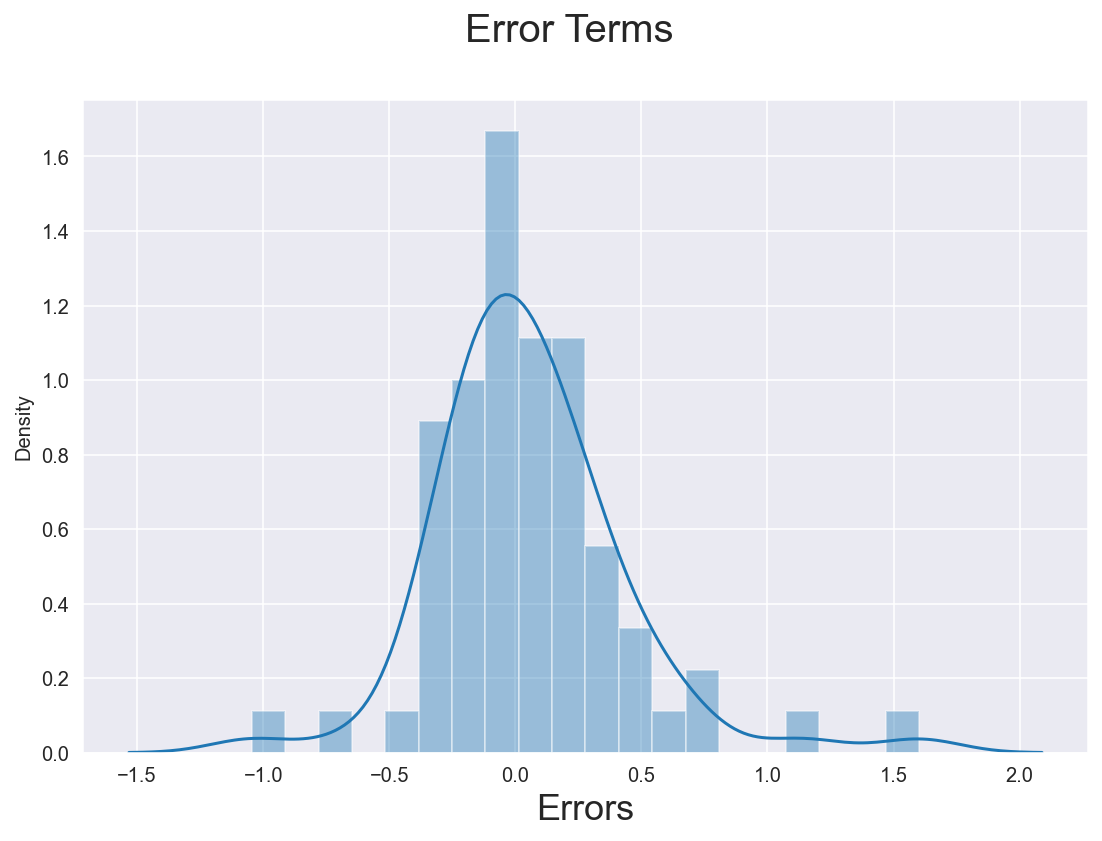

In [224]:
fig = plt.figure(figsize=(9,6))
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)
plt.show()

Analysis: The error terms are distributed around zero, which means that the prediction of the model is not random.

Another method to check, is to draw a graph of the predictions against the residualss, and see if the points are evenly distributed or not.

Text(0, 0.5, 'Residuals')

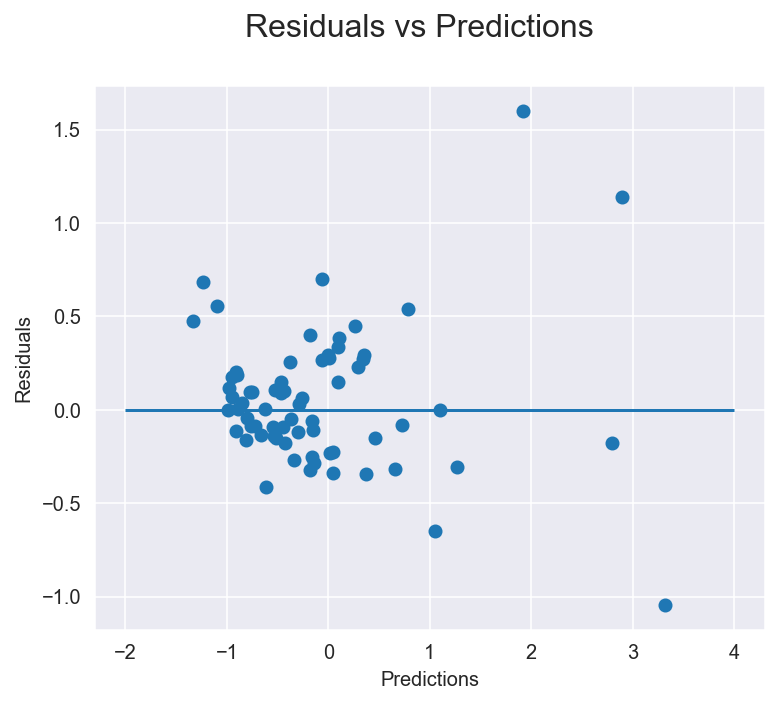

In [225]:
plt.figure(figsize=(6,5))
plt.scatter(y_pred, residual)
plt.hlines(0,-2,4)
plt.suptitle('Residuals vs Predictions', fontsize=16)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

###### Analysis: 
We can see that the values are evenly distributed around 0, with only a few outliers .

###### Anderson-Darling Test and Q-Q Plot of residuals

###### Q-Q Plot:
An arc-shaped deflection trace with respect to the diagonal implies that the residuals have an excessive asymmetry, meaning that the distribution is not symmetrical, with too many important residuals in one direction.

###### Anderson-Darling Test
Remains the most used by experts, to check the standard of errors.

It tests:

H0: Data follows normal distribution

H1: Data does not follow normal distribution

How to check H0?

A level of significance is chosen by us (5% in our case), which is associated with a critical value.

If the returned A-D statistic is greater than the critical value for the chosen significance level, then H0 must be rejected.



----Anderson-Darling test ---- 
statistic: 0.5530, critical value of 5%: 0.7660


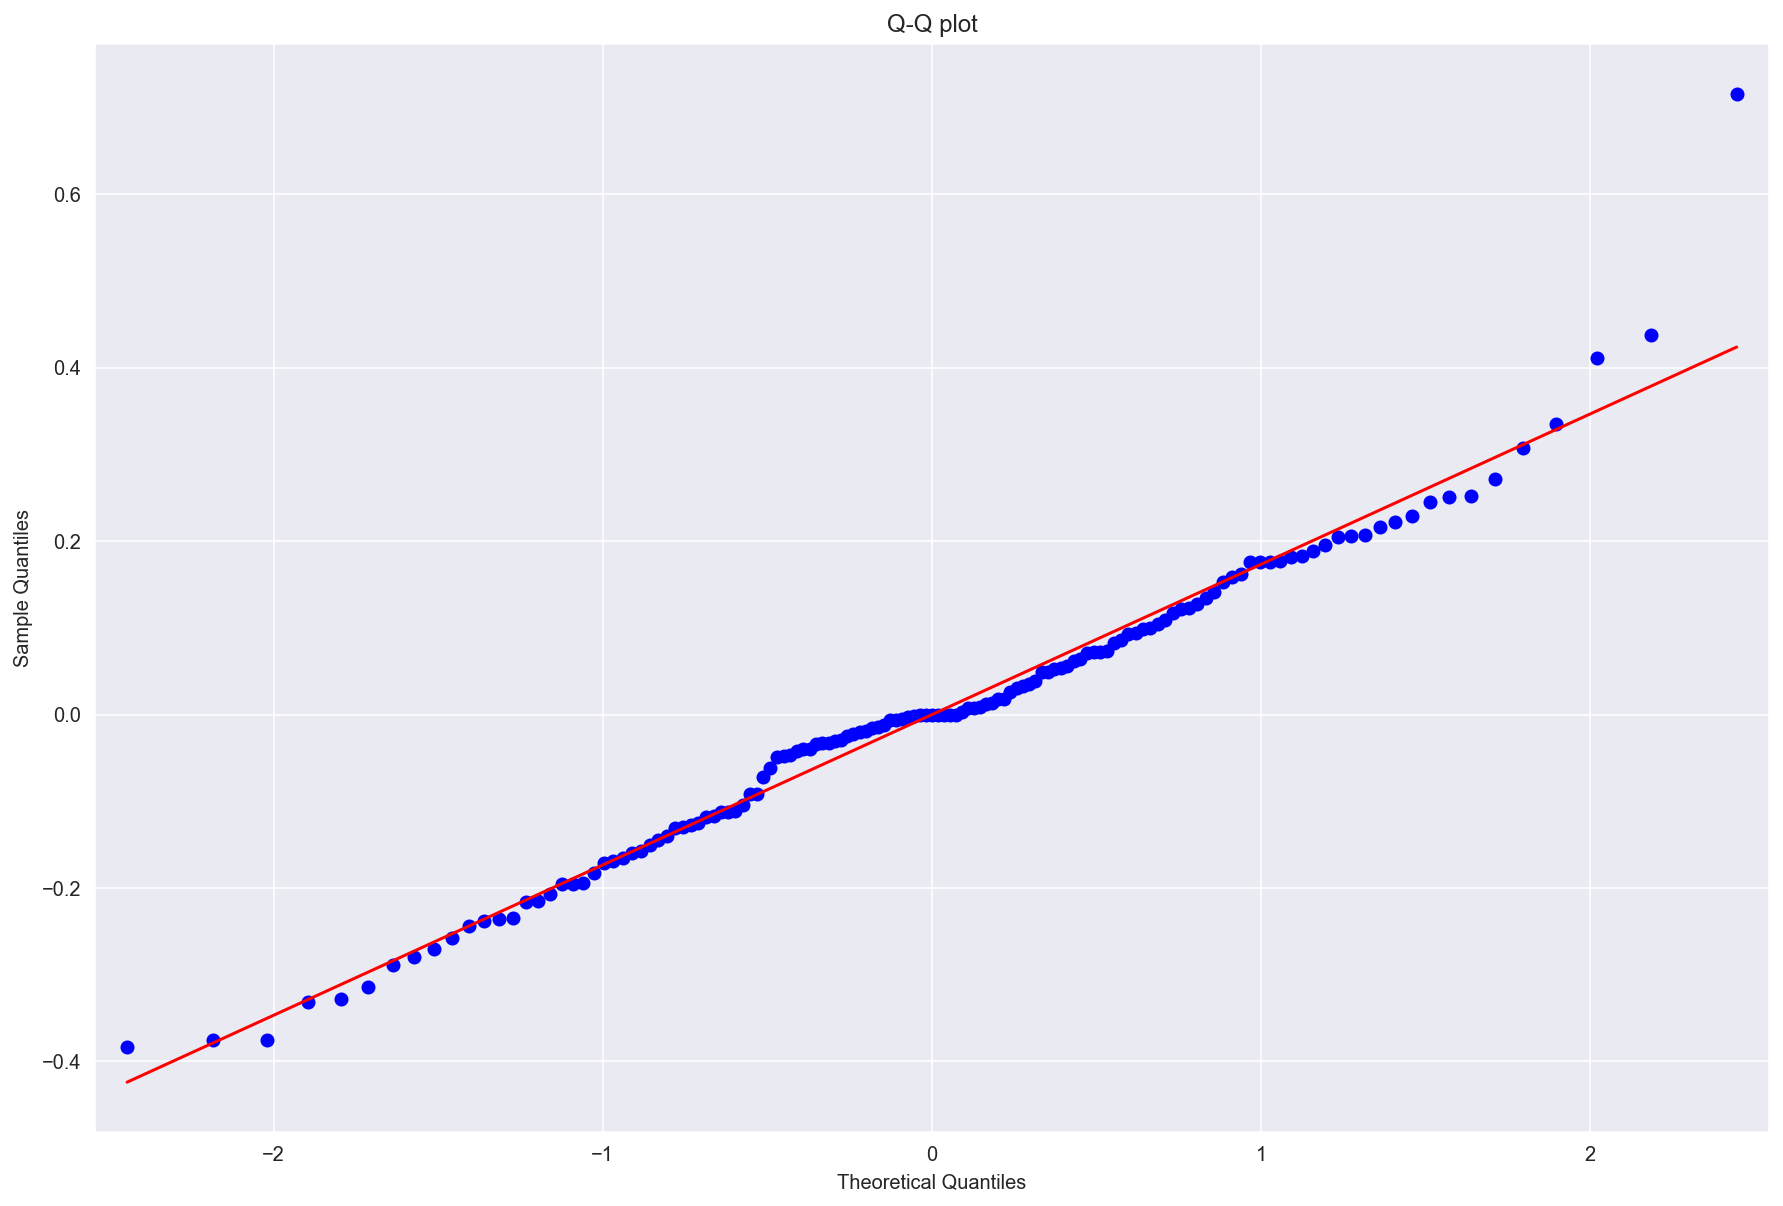

In [226]:
from scipy import stats

def normality_of_residuals_test(model):
    '''
    Function to establish the normal QQ graph of the residues and perform the Anderson-Darming statistical test to study the normality of the residuals.
    
    Arg:
    * model - OLS models adapted from statsmodels
    '''
    sm.ProbPlot(lm.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    ad = stats.anderson(lm.resid, dist='norm')
    
    print(f'----Anderson-Darling test ---- \nstatistic: {ad.statistic:.4f}, critical value of 5%: {ad.critical_values[2]:.4f}')
    
normality_of_residuals_test(lm)

The trace does not have an arc shape.

the test accepts H0 that the data follow the normal distribution (stats < critical value of 5%)

#### 4. Independence of errors

This means that the residuals (i.e errors) should not be correlated.

Plot of residuals against their order.
What must alert us is the existence of a tendency, which tells us that the errors are in fact dependent.

Text(0, 0.5, 'Residuals')

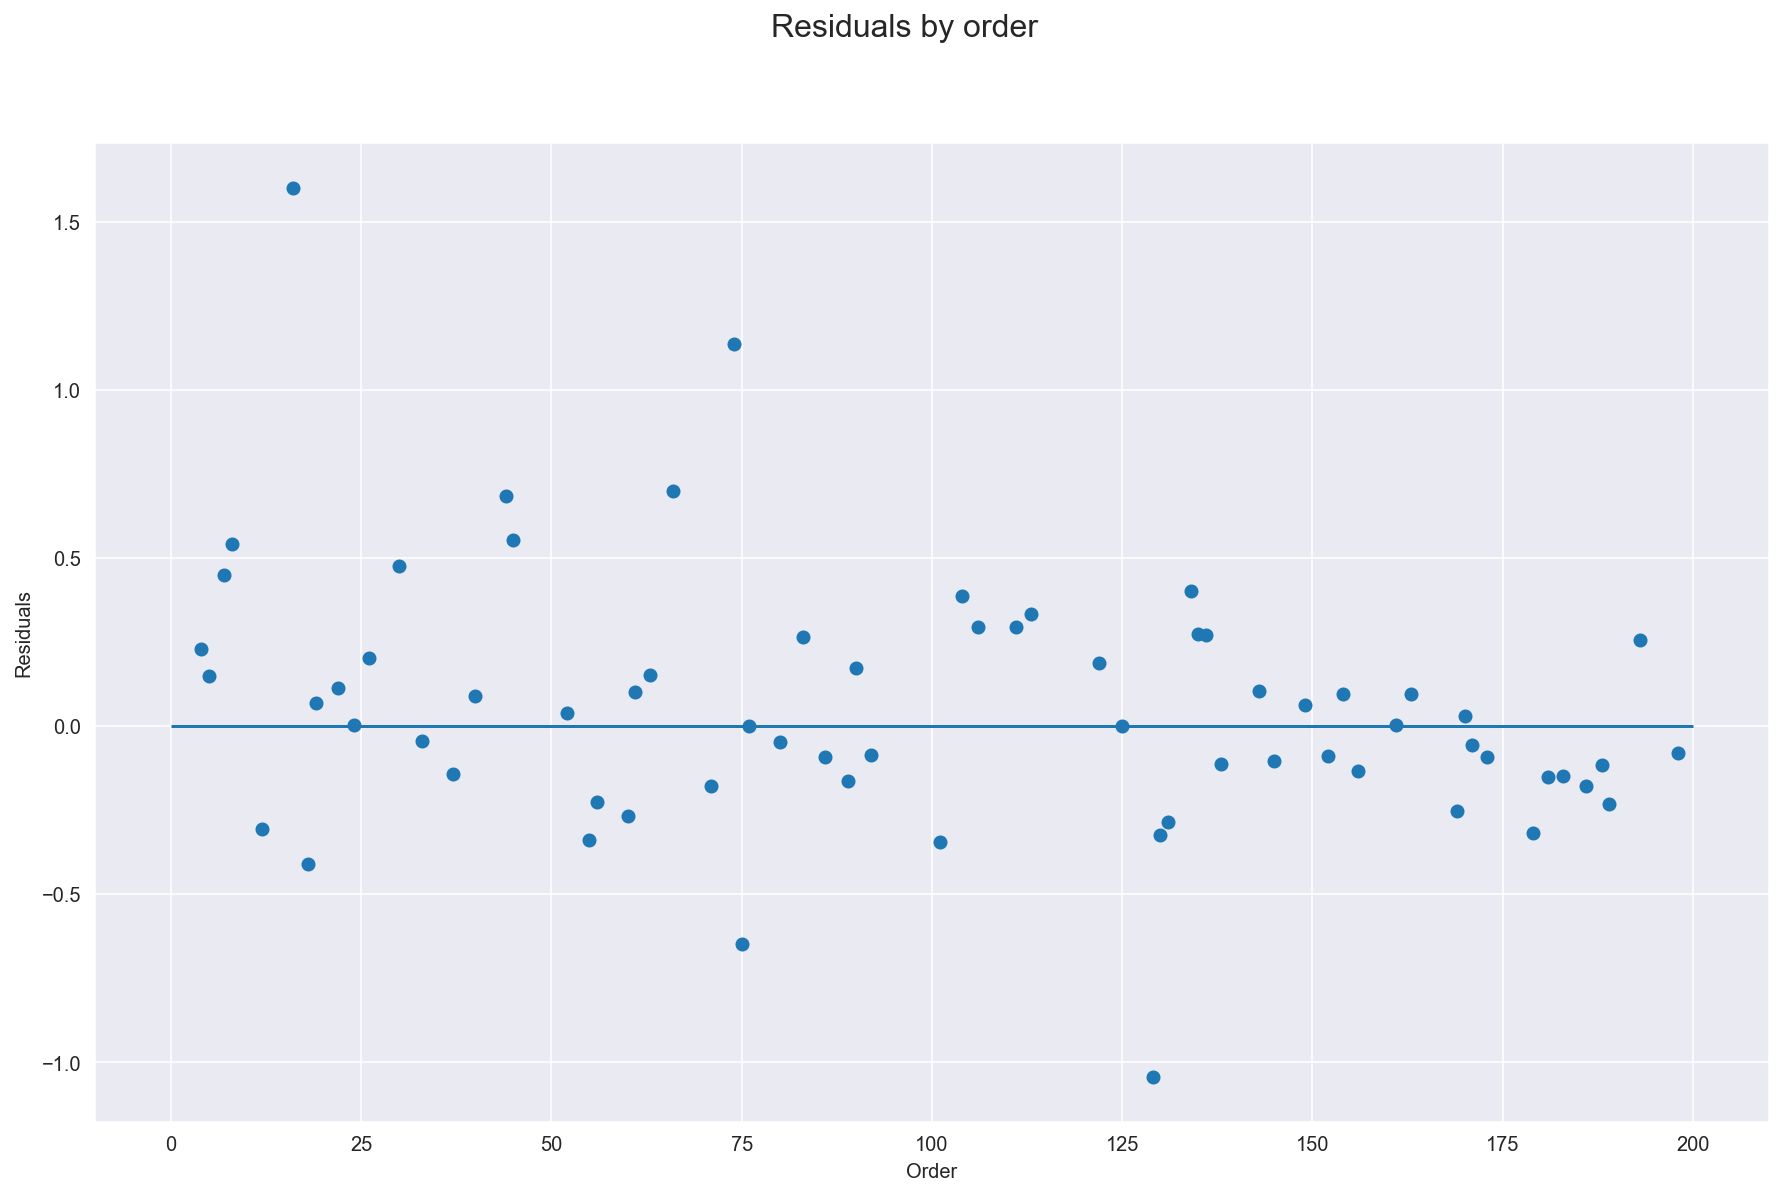

In [227]:
plt.figure(figsize=(15,9))
plt.scatter(residual.index, residual.values)
plt.hlines(0,0,200)
plt.suptitle('Residuals by order', fontsize=16)
plt.xlabel('Order')
plt.ylabel('Residuals')

#### Durbin_Watson Test
The test of Durbin-Watson tests the null hypothesis that the residuals are not dependent (autocorrelated) on each other.

The test returns a value d between 0 and 4.

A value d = 2: No autocorrelation detected in the sample.

A value d < 2: indicate a positive autocorrelation.

A d > 2 value: indicate a negative autocorrelation.

In general, values of d ~ 2 indicate that there is no dependence (no autocorrelation) between the residuals.

In [228]:
from statsmodels.stats.stattools import durbin_watson
print(durbin_watson(residual))

[1.78892803]


##### ACF - Auto-Correlation Function plots
We want to see if the value of ACF is significant for each bar.

By calling the function, we indicate the level of significance that interests us (alpha = 0.05 in our case) and the critical zone is drawn on the graph (In blue).

Significant correlations lie outside this area.

Note: First bar is always at 1.

<ipython-input-229-829205fe1f15>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


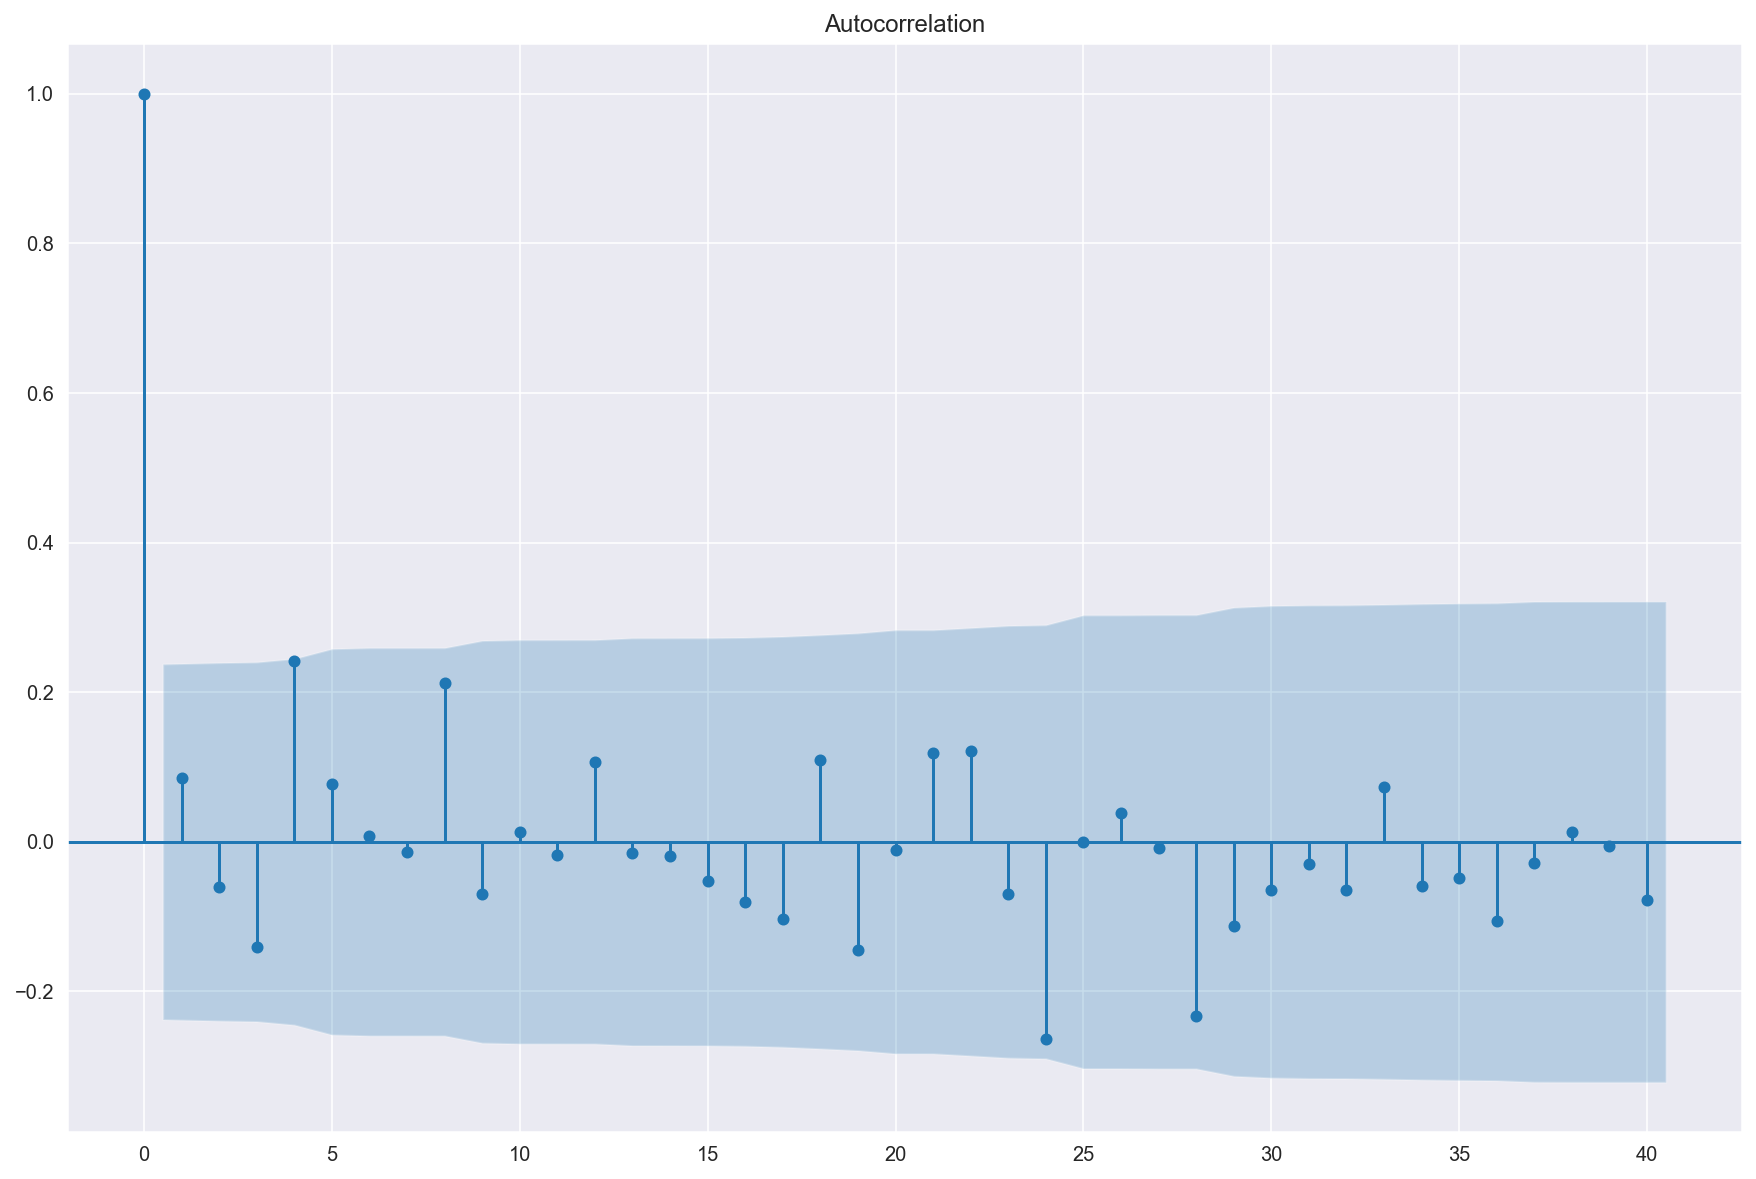

In [229]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

### 5. Homoscedasticity

This assumption indicates that the variance of the residuals must be similar for the values of the independent variables.

We can verify this by plotting the residuals against the predicted values.

To identify homo-dedasticity in the graph, the location of the points should be random and no trend should be visible, and the red regression line in the graph should be as flat as possible (not of an arch form).

###### Goldfeld-Quandt test:

Null hypothesis H0: the error terms are homoscedastic
Alternative Hypothesis H1: The error terms are heteroscedastic.
    
Recall:

If P-value <= 0.05 ==> We reject the null hypothesis H0

If P-Value> 0.05 ==> The null hypothesis H0 is true


----Goldfeld-Quandt test ----
[('F statistic', 1.8786403206327862), ('p-value', 0.07034410207973137)]

----Residuals plots ----


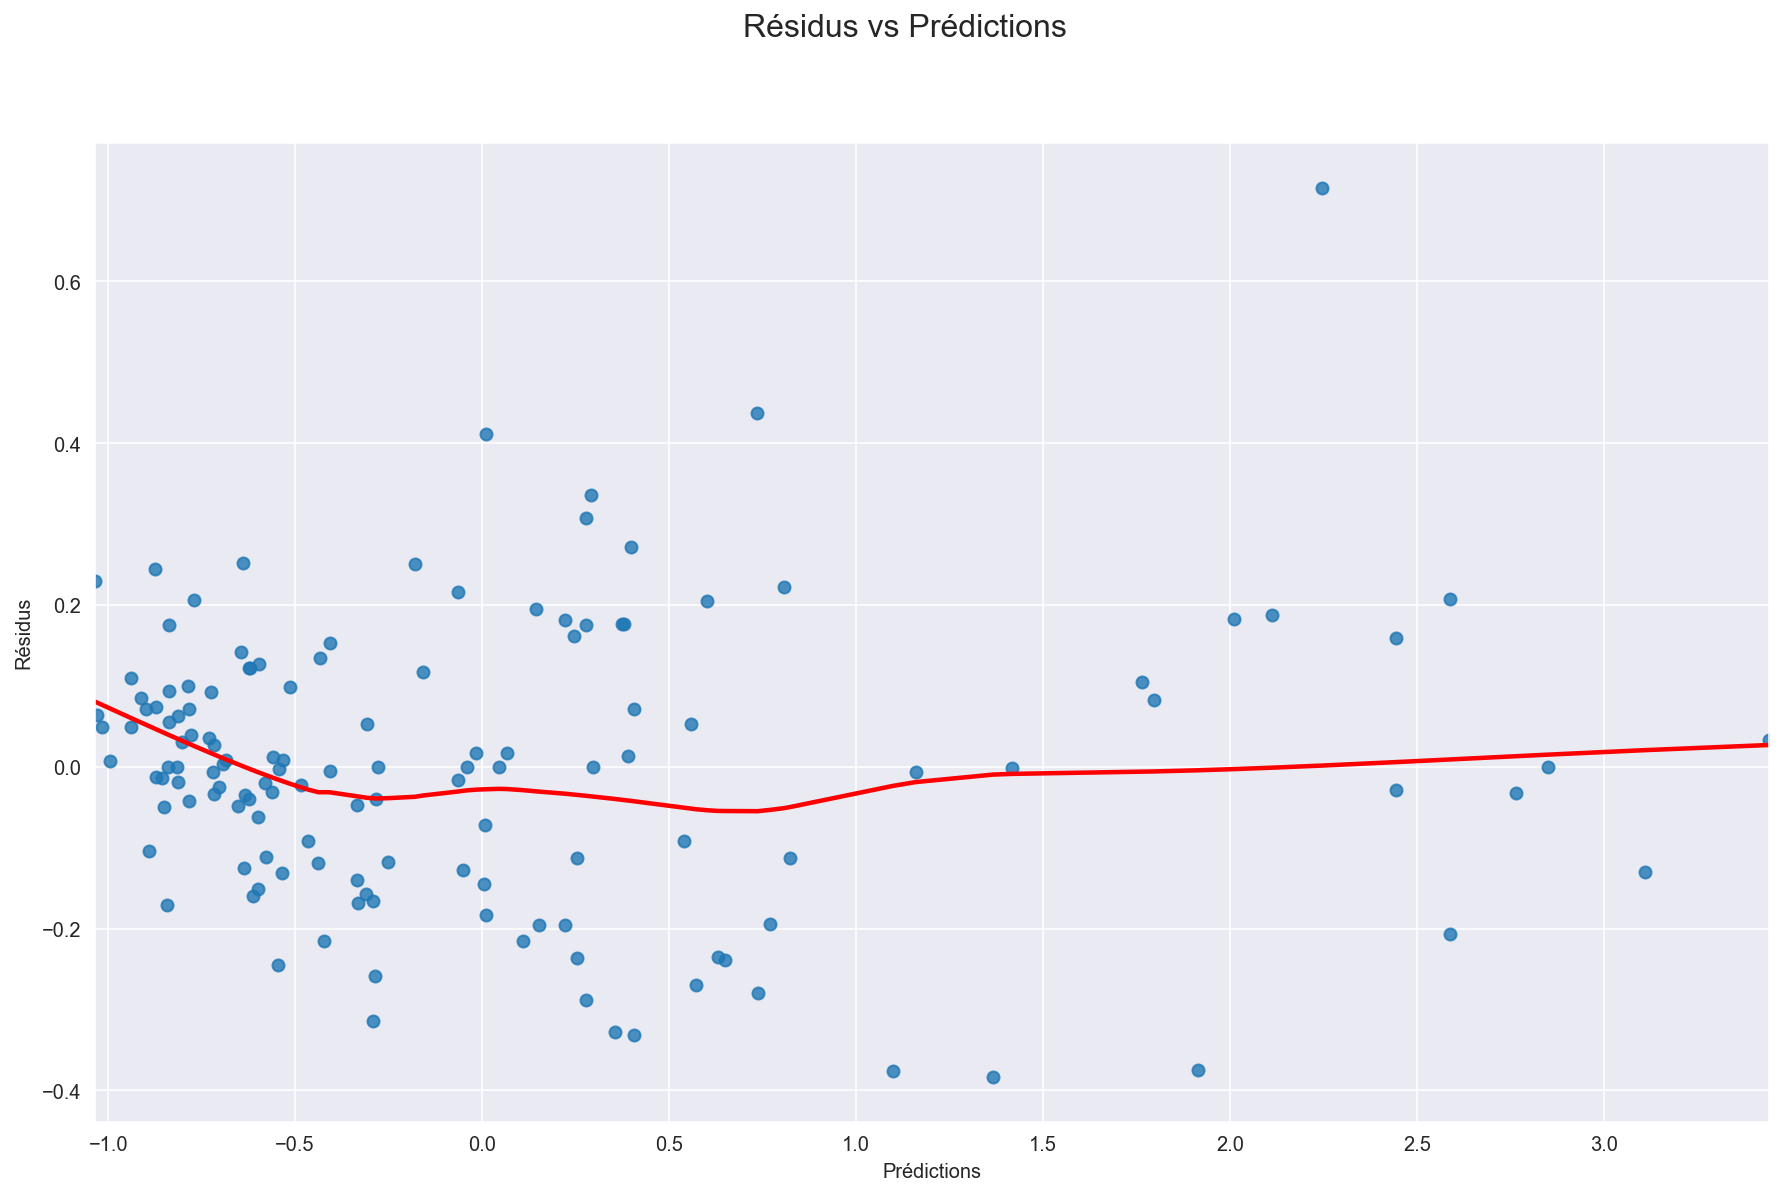

In [230]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def homoscedasticity_test(model):

    fitted_vals = model.predict()
    resids = model.resid

    #fit_reg=False
    sns.regplot(x=fitted_vals, y=resids, lowess=True, line_kws={'color': 'red'})
    plt.suptitle('Résidus vs Prédictions', fontsize=16)
    plt.xlabel('Prédictions')
    plt.ylabel('Résidus')

    print('\n----Goldfeld-Quandt test ----')
    name = ['F statistic', 'p-value']
    test = sms.het_goldfeldquandt(lm.resid, lm.model.exog)
    print(lzip(name, test))
    print('\n----Residuals plots ----')

homoscedasticity_test(lm)

Analysis:

P-Value test Goldfeld-Quandt > 0.05, so we accept H0 saying that the error terms are homoscedastic, which means that the residuals have a constant variance.

Also, in the plot, the points are scattered randomly, no tendancy to be found, and the line doesn't have the form of an arch

all the hypotheses are verified

Evaluation of the test via the comparison of y_pred and y_test

What we are looking for is that the errors should be as close as possible to the line, wich is the case in the plot below

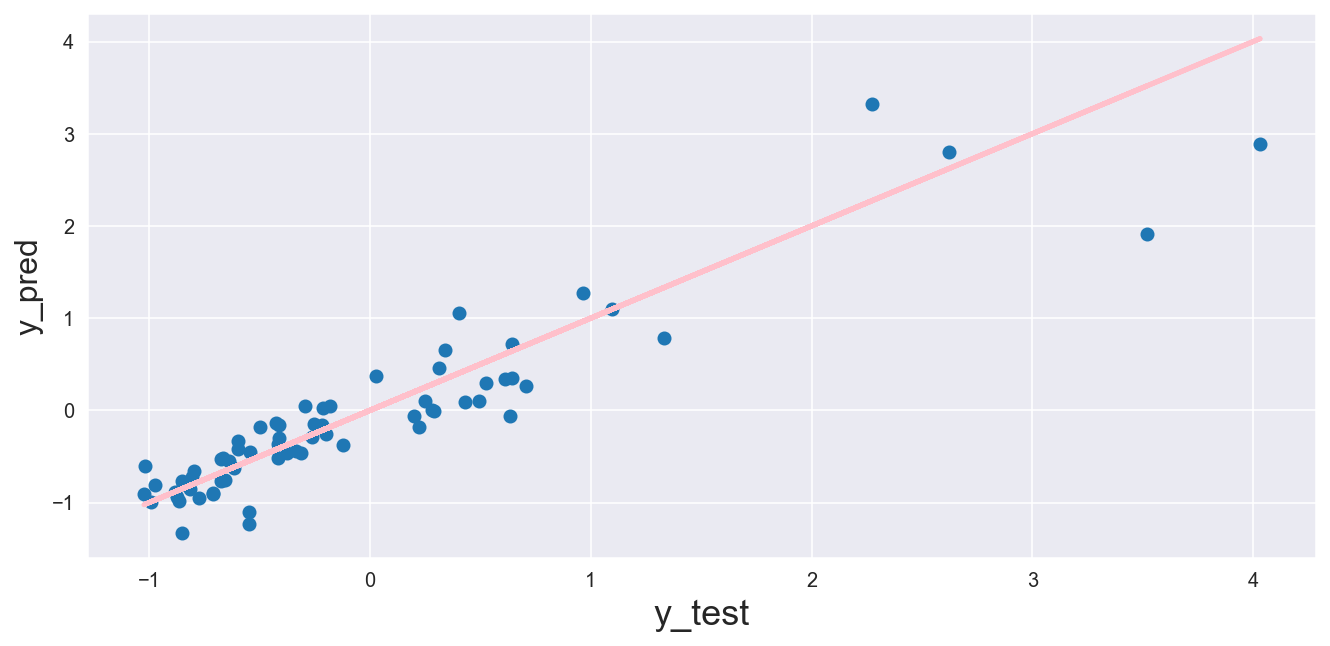

In [231]:
# Comparison of y_pred and y_test

fig = plt.figure(figsize=(11,5))
plt.scatter(y_test,y_pred)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

#Regression Line function
f = lambda x: x

# x values of line to plot
x = np.array(y_test)

# plot fit
plt.plot(x,f(x),lw=2.5, c="pink")

The aim of this plot is to ensure that the points should be as close to the line as possible which is what gives it the 45degree angel of diplay

### Final Summary

Coefficient of determination R²:

Recall:

If R² = 0: the dependent variable Y can not be predicted from the independent variable X

If R² = 1: the dependent variable Y can be predicted from the independent variable X

If 0 <R² <1: Indicates the percentage at which the dependent variable Y is predictable by X

In [232]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8517746628269995

In [233]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     56.21
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           1.01e-48
Time:                        19:47:53   Log-Likelihood:                 45.643
No. Observations:                 137   AIC:                             10.71
Df Residuals:                      86   BIC:                             159.6
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
wheelbase                  0

#### Observations after modeling 

- 59 variables were used to get R²> 0.8, which is too much.

- From the summary above, P-values of some variables appear to be greater than 0.05, meaning they are statistically insignificant, these variables should then be dropped.

### Recursive Feature Elimination (RFE)

In the section of Exploring Data, we have identified the relevant independent variables that are correlated with the independent variable Price, and which are not correlated with each other (ie no multi-collinearity), and we said that we need to keep them, and ignore the rest.

To do that, we will use a mixed approach to find the relevant features:

 1.Identify these variables using RFE (Recursive Feature Elimination)

 2.Manual approach to find the right fit
The use of RFE gives us an automated way to select important attributes that can influence the dependent variable (i.e Price).

We will use a mixed approach here and initially, we will simply use the functionalities returned by RFE as a starting model.

In [234]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [235]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [238]:
rfe = RFE(regression,10)
rfe = rfe.fit(X_train,y_train)

C:\Users\cdzek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Extract important variables

The RFE() method returns a "support_" array of variables considered important:

If support_ == True: Important variable

If support_ == False: Not important variable

In [239]:
for z in range(len(X_train.columns)):
    print(X_train.columns[z],'\t\t\t',rfe.support_[z])

wheelbase 			 False
boreratio 			 False
horsepower 			 True
citympg 			 False
symboling_-1 			 False
symboling_0 			 False
symboling_1 			 False
symboling_2 			 False
symboling_3 			 False
CompanyName_audi 			 False
CompanyName_bmw 			 True
CompanyName_buick 			 True
CompanyName_chevrolet 			 False
CompanyName_dodge 			 False
CompanyName_honda 			 False
CompanyName_isuzu 			 False
CompanyName_jaguar 			 True
CompanyName_mazda 			 False
CompanyName_mercury 			 False
CompanyName_mitsubishi 			 False
CompanyName_nissan 			 False
CompanyName_peugeot 			 False
CompanyName_plymouth 			 False
CompanyName_porsche 			 True
CompanyName_renault 			 False
CompanyName_saab 			 False
CompanyName_subaru 			 False
CompanyName_toyota 			 False
CompanyName_volkswagen 			 False
CompanyName_volvo 			 False
fueltype_gas 			 False
aspiration_turbo 			 False
doornumber_two 			 False
carbody_hardtop 			 True
carbody_hatchback 			 True
carbody_sedan 			 True
carbody_wagon 			 True
drivewheel_fwd 			 False
driv

In [240]:
col = X_train.columns[rfe.support_]
for x in col:
    print(x)

horsepower
CompanyName_bmw
CompanyName_buick
CompanyName_jaguar
CompanyName_porsche
carbody_hardtop
carbody_hatchback
carbody_sedan
carbody_wagon
enginelocation_rear


In [241]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,horsepower,CompanyName_bmw,CompanyName_buick,CompanyName_jaguar,CompanyName_porsche,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginelocation_rear
155,-1.067671,0,0,0,0,0,0,0,1,0
97,-0.890221,0,0,0,0,0,0,0,1,0
54,-0.915571,0,0,0,0,0,0,1,0,0
184,-1.321172,0,0,0,0,0,0,1,0,0
51,-0.915571,0,0,0,0,0,1,0,0,0


In [244]:
import statsmodels.api as sm 

def color_code_vif_values(val):
    """
    Take a scalar and return a string with the property css 'color: red' for 10, black otherwise.
    """
    if val > 10 : color = 'red' 
    elif val > 5 and val <= 10 : color = 'blue'
    elif val > 0 and val <= 5 : color = 'darkgreen'
    else : color = 'black'
    return 'color: %s' % color

def drop_col(dataframe,col_to_drop) :
    dataframe.drop([col_to_drop],axis=1,inplace=True)
    return dataframe

def display_vif(x) :
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    X = x
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.set_index("Features")
    vif = vif.sort_values(by = "VIF", ascending = False)
    df = pd.DataFrame(vif.VIF).style.applymap(color_code_vif_values)
    display(df)
    
model_count = 0

def statsmodel_summary(y_var,x_var) :
    global model_count
    model_count = model_count + 1
    text = "*****MODEL - " + str(model_count)
    print(text)
    
    x_var_const = sm.add_constant(x_var) # adding constant
    lm = sm.OLS(y_var,x_var_const).fit() # calculating the fit
    print(lm.summary()) # print summary for analysis
    display_vif(x_var_const.drop(['const'],axis=1))
    return x_var_const , lm

I. Check the multicollinearity between the variables selected by RFE
To do that, we base ourselves on 2 things:

1.P-Value:

P-Value <= **0.05** means that this particular independent variable greatly improves the fit of the model

P-value > **0.05** no improvement

2.VIF (Variance Inflation Factor):

VIF > **5**, there is an indication that multicollinearity may be present, but not enough to worry.

VIF > **10**, there is certainly a multicollinearity among the variables.

In [245]:
lm = statsmodel_summary(y_train,X_train_rfe)

*****MODEL - 1
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     116.6
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           5.55e-57
Time:                        19:48:37   Log-Likelihood:                -42.801
No. Observations:                 137   AIC:                             105.6
Df Residuals:                     127   BIC:                             134.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const              

C:\Users\cdzek\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF
Features,
CompanyName_porsche,inf
enginelocation_rear,inf
horsepower,1.710000
CompanyName_jaguar,1.360000
carbody_hardtop,1.340000
carbody_sedan,1.230000
CompanyName_bmw,1.190000
CompanyName_buick,1.170000
carbody_wagon,1.030000


P-value analysis: P-value of carbody_sedan > 0.05. We must delete it.

In [246]:
X_train_rfe = X_train_rfe.drop(["carbody_sedan"], axis = 1)
X_train_rfe.head()

,horsepower,CompanyName_bmw,CompanyName_buick,CompanyName_jaguar,CompanyName_porsche,carbody_hardtop,carbody_hatchback,carbody_wagon,enginelocation_rear
155,-1.067671,0,0,0,0,0,0,1,0
97,-0.890221,0,0,0,0,0,0,1,0
54,-0.915571,0,0,0,0,0,0,0,0
184,-1.321172,0,0,0,0,0,0,0,0
51,-0.915571,0,0,0,0,0,1,0,0


In [247]:
lm = statsmodel_summary(y_train,X_train_rfe)

*****MODEL - 2
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     130.2
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           1.11e-57
Time:                        19:48:37   Log-Likelihood:                -43.733
No. Observations:                 137   AIC:                             105.5
Df Residuals:                     128   BIC:                             131.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const              

C:\Users\cdzek\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF
Features,
CompanyName_porsche,inf
enginelocation_rear,inf
horsepower,1.650000
carbody_hardtop,1.340000
CompanyName_jaguar,1.250000
CompanyName_buick,1.110000
CompanyName_bmw,1.050000
carbody_wagon,1.030000
carbody_hatchback,1.020000


P-value analysis: P-value of carbody_wagon > 0.05. We must delete it.

In [248]:
X_train_rfe = X_train_rfe.drop(["carbody_wagon"], axis = 1)
X_train_rfe.head()

,horsepower,CompanyName_bmw,CompanyName_buick,CompanyName_jaguar,CompanyName_porsche,carbody_hardtop,carbody_hatchback,enginelocation_rear
155,-1.067671,0,0,0,0,0,0,0
97,-0.890221,0,0,0,0,0,0,0
54,-0.915571,0,0,0,0,0,0,0
184,-1.321172,0,0,0,0,0,0,0
51,-0.915571,0,0,0,0,0,1,0


In [249]:
lm = statsmodel_summary(y_train,X_train_rfe)

*****MODEL - 3
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     148.6
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           1.43e-58
Time:                        19:48:37   Log-Likelihood:                -44.263
No. Observations:                 137   AIC:                             104.5
Df Residuals:                     129   BIC:                             127.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const              

C:\Users\cdzek\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF
Features,
CompanyName_porsche,inf
enginelocation_rear,inf
horsepower,1.620000
carbody_hardtop,1.340000
CompanyName_jaguar,1.240000
CompanyName_buick,1.100000
CompanyName_bmw,1.050000
carbody_hatchback,1.020000


P-value analysis: All variables have p-value <0.05

Next step: Delete CompanyName_porsche because VIF> 10

In [250]:
X_train_rfe = X_train_rfe.drop(["CompanyName_porsche"], axis = 1)
X_train_rfe.head()

,horsepower,CompanyName_bmw,CompanyName_buick,CompanyName_jaguar,carbody_hardtop,carbody_hatchback,enginelocation_rear
155,-1.067671,0,0,0,0,0,0
97,-0.890221,0,0,0,0,0,0
54,-0.915571,0,0,0,0,0,0
184,-1.321172,0,0,0,0,0,0
51,-0.915571,0,0,0,0,1,0


In [251]:
lm = statsmodel_summary(y_train,X_train_rfe)

*****MODEL - 4
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     148.6
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           1.43e-58
Time:                        19:48:37   Log-Likelihood:                -44.263
No. Observations:                 137   AIC:                             104.5
Df Residuals:                     129   BIC:                             127.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const              

,VIF
Features,
horsepower,1.620000
enginelocation_rear,1.570000
carbody_hardtop,1.340000
CompanyName_jaguar,1.240000
CompanyName_buick,1.100000
CompanyName_bmw,1.050000
carbody_hatchback,1.020000


All P-Values are less than 0.05, and all VIF values are less than 5.

Turning now to the prediction and evaluation of our model

Prediction and Evaluation

Creation of X_test_new by keeping only the relevant variables found by RFE.

In [252]:
#Array containing names of important variables
final_features = list(X_train_rfe.columns)

#Filter the test dataset
X_test_new = X_test.filter(final_features)

X_test_new.head()

,horsepower,CompanyName_bmw,CompanyName_buick,CompanyName_jaguar,carbody_hardtop,carbody_hatchback,enginelocation_rear
52,-0.915571,0,0,0,0,1,0
181,1.315237,0,0,0,0,0,0
5,0.149133,0,0,0,0,0,0
18,-1.422573,0,0,0,0,1,0
188,-0.104368,0,0,0,0,0,0


In [253]:
# Making predictions
lm = sm.OLS(y_train,X_train_rfe).fit()

y_pred=lm.predict(X_test_new)

In [254]:
resid = y_test - y_pred.to_frame('price')

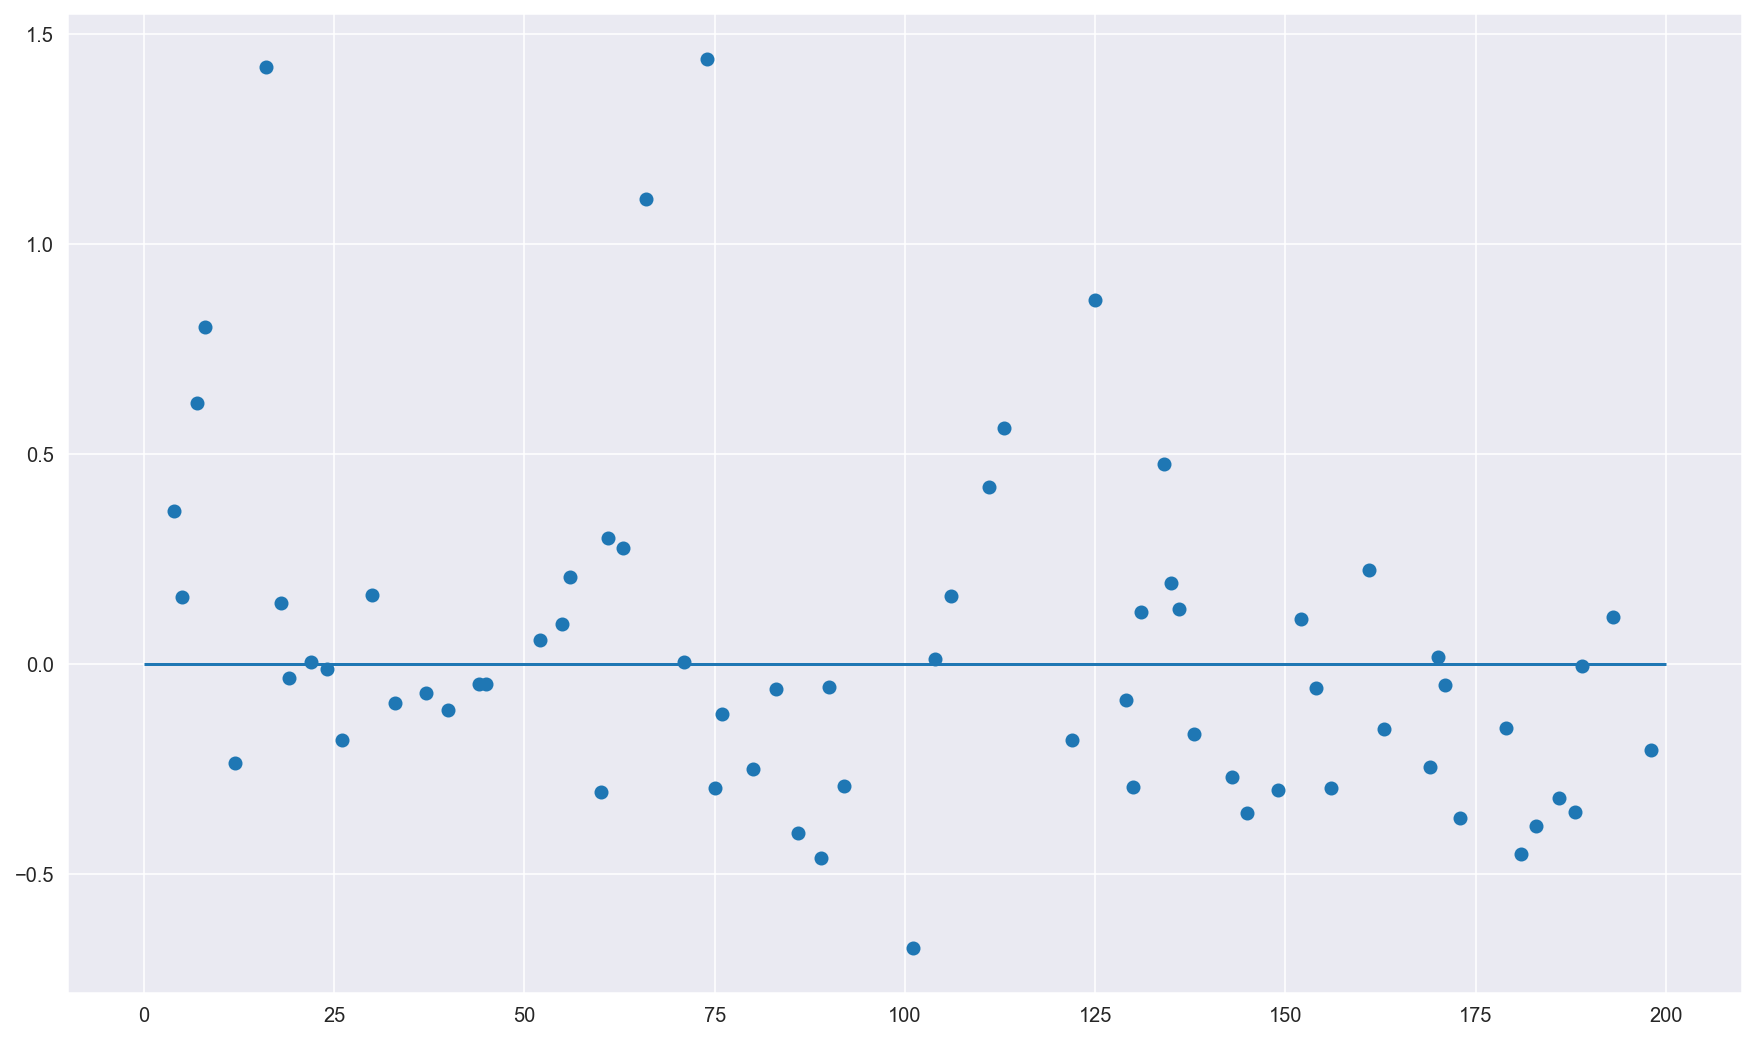

In [257]:
plt.figure(figsize=(15,9))
plt.scatter(resid.index, resid.values)
plt.hlines(0,0,200)

Durbin_Watson Test

In [260]:
print(durbin_watson(resid))

[2.18951495]


ACF - Auto-Correlation Function plots

<ipython-input-261-616922f9a8db>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


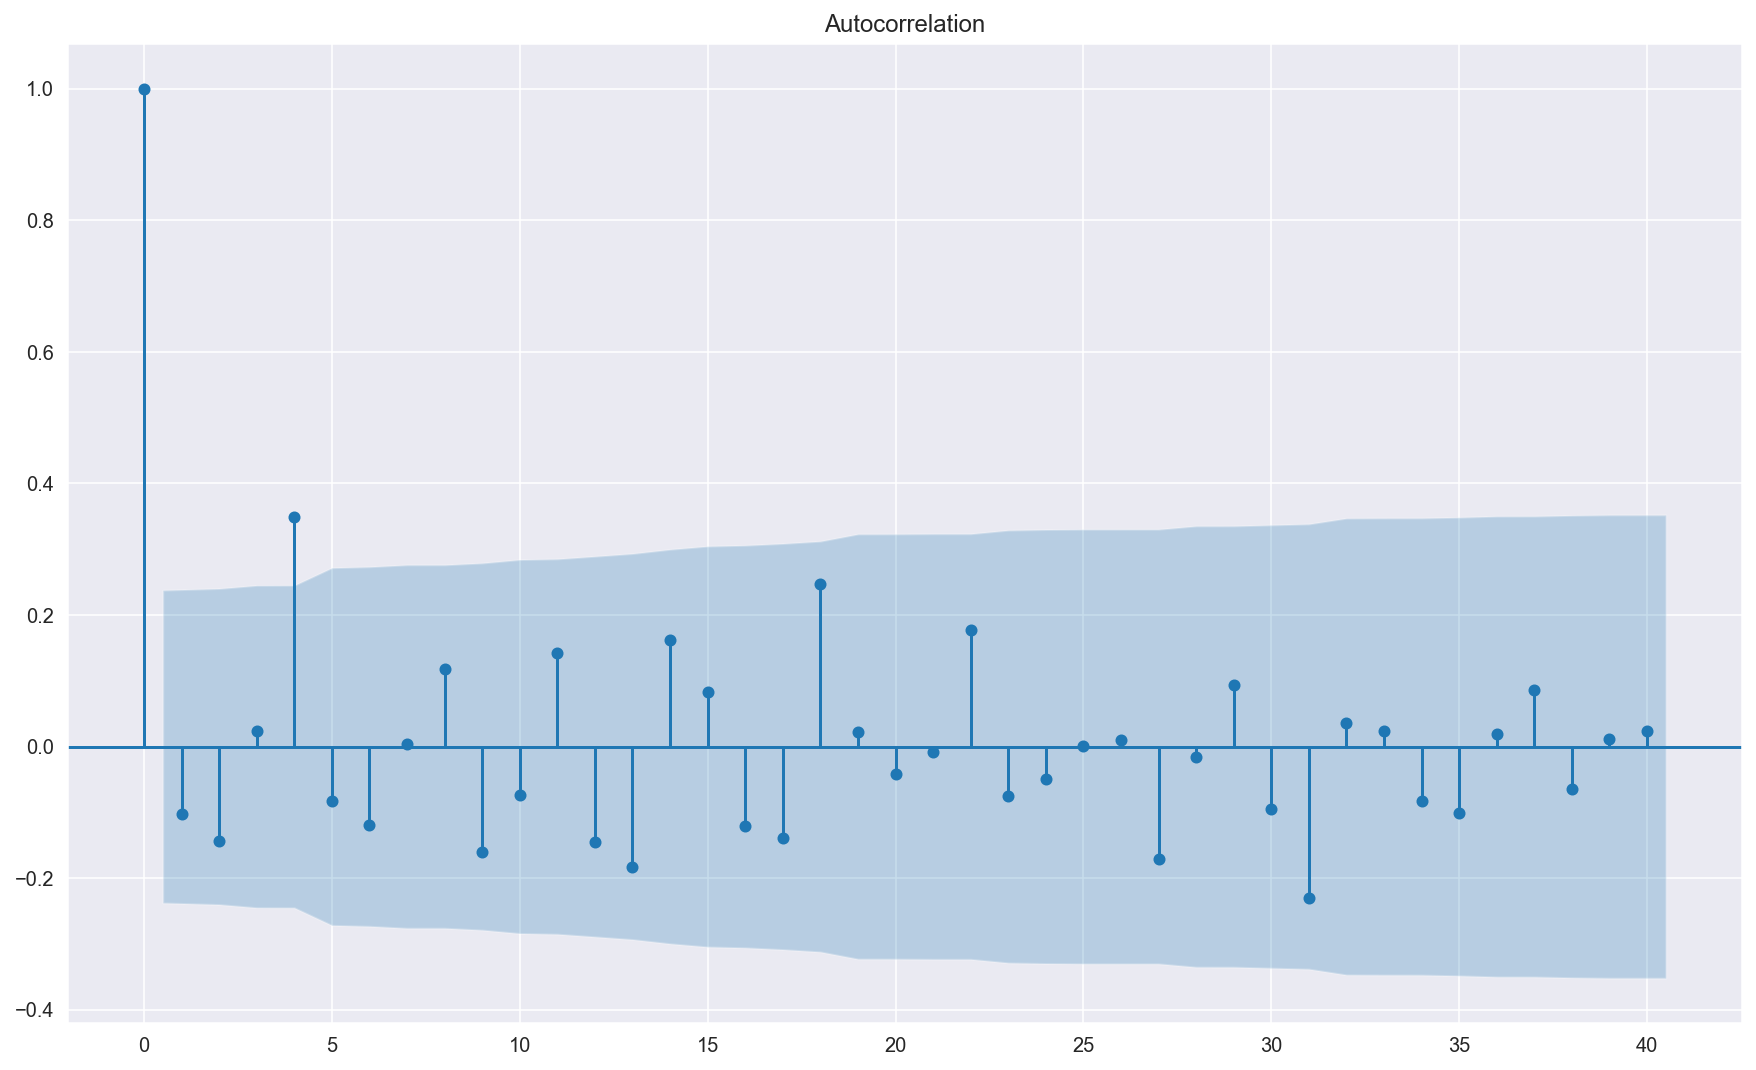

In [261]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(resid, lags=40 , alpha=0.05)
acf.show()

We see that all the bars are inside the blue zone, except one, which is acceptable since Durbin_Watson has returned a value very close to 2.0

#### Homoscedasticity


----Goldfeld-Quandt test ----
[('F statistic', 1.1902919418802493), ('p-value', 0.2480365534271782)]

----Residuals plots ----


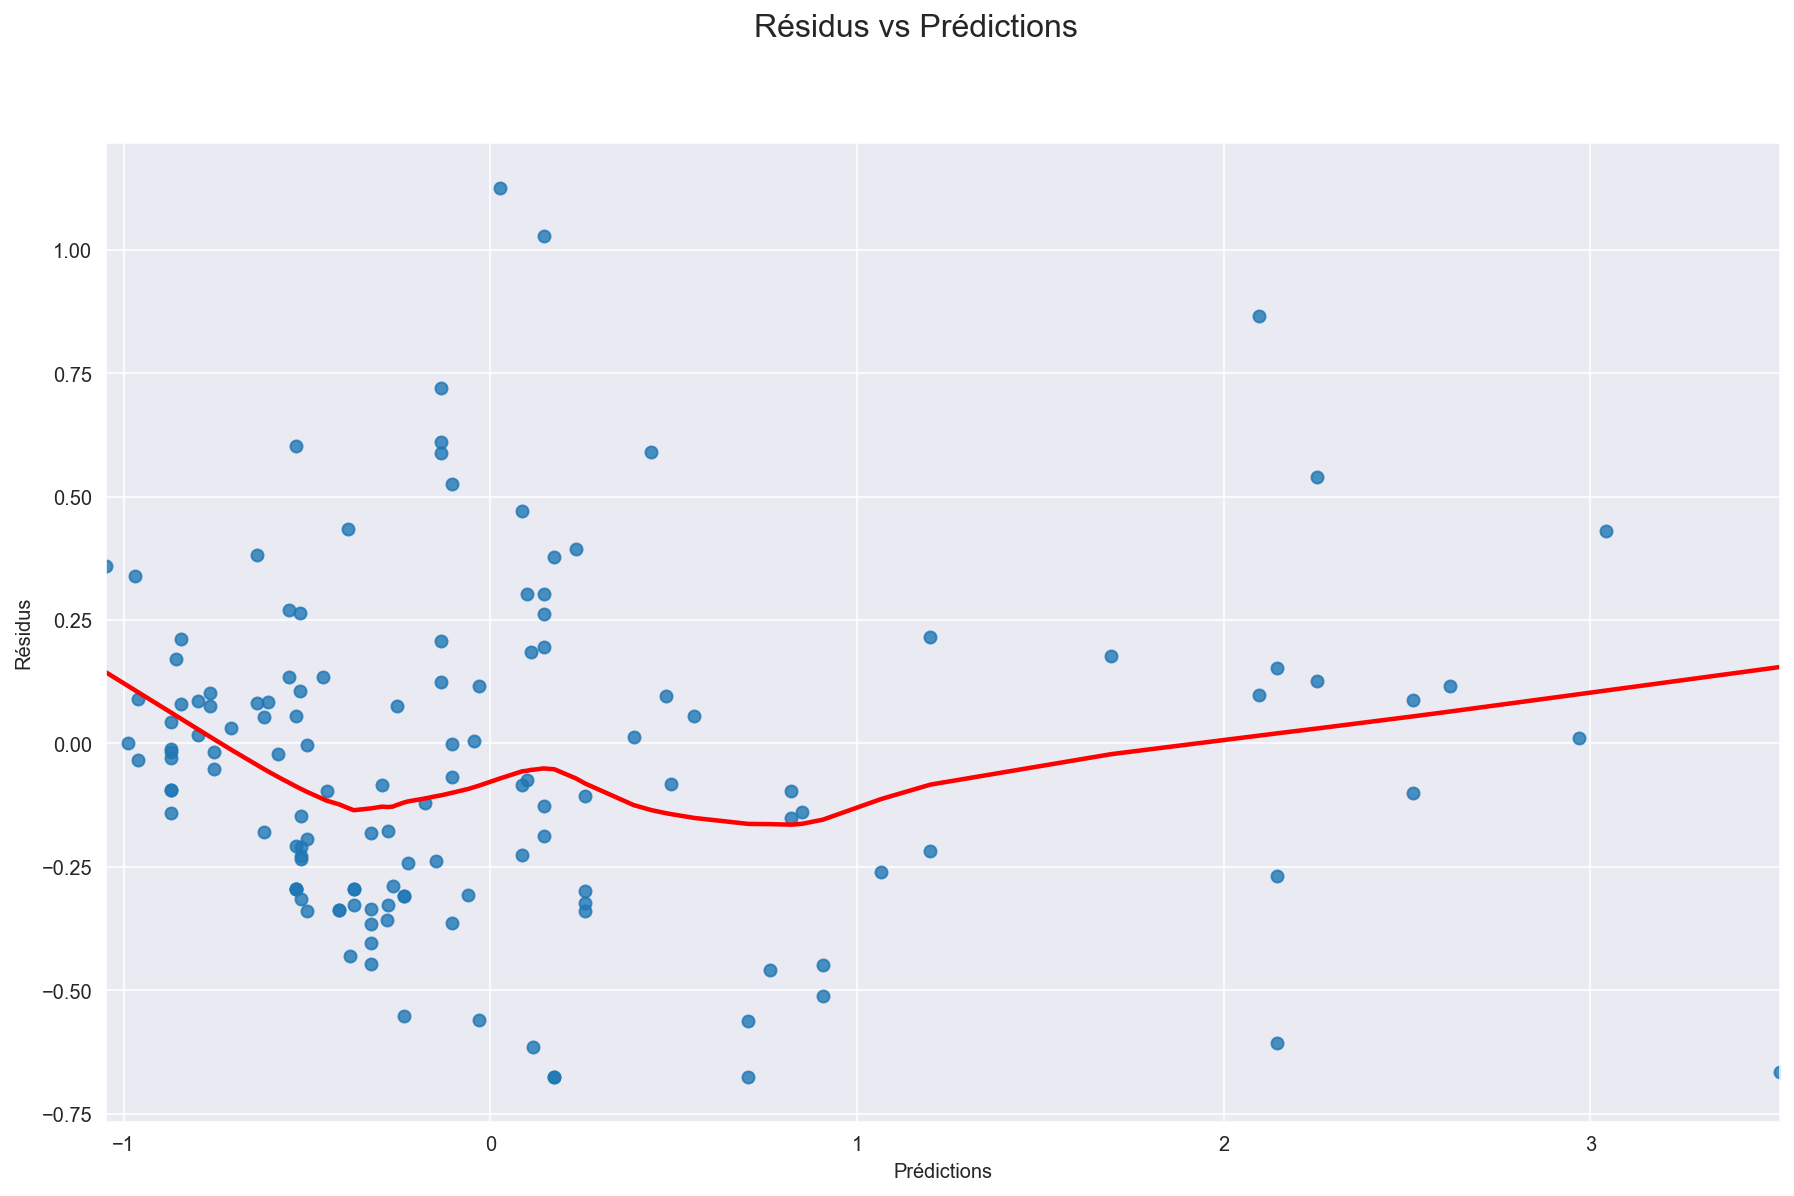

In [262]:
homoscedasticity_test(lm)

#### Analysis:

P-Value of Goldfeld-Quandt Test > 0.05, so we accept H0 saying that the error terms are homoscedastic, which means that the residuals have a constant variance.

Also, in the plot, the points are scattered randomly, no tendancy to be found, and the line doesn't have the form of an arc

#### Normality of the error distribution

C:\Users\cdzek\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


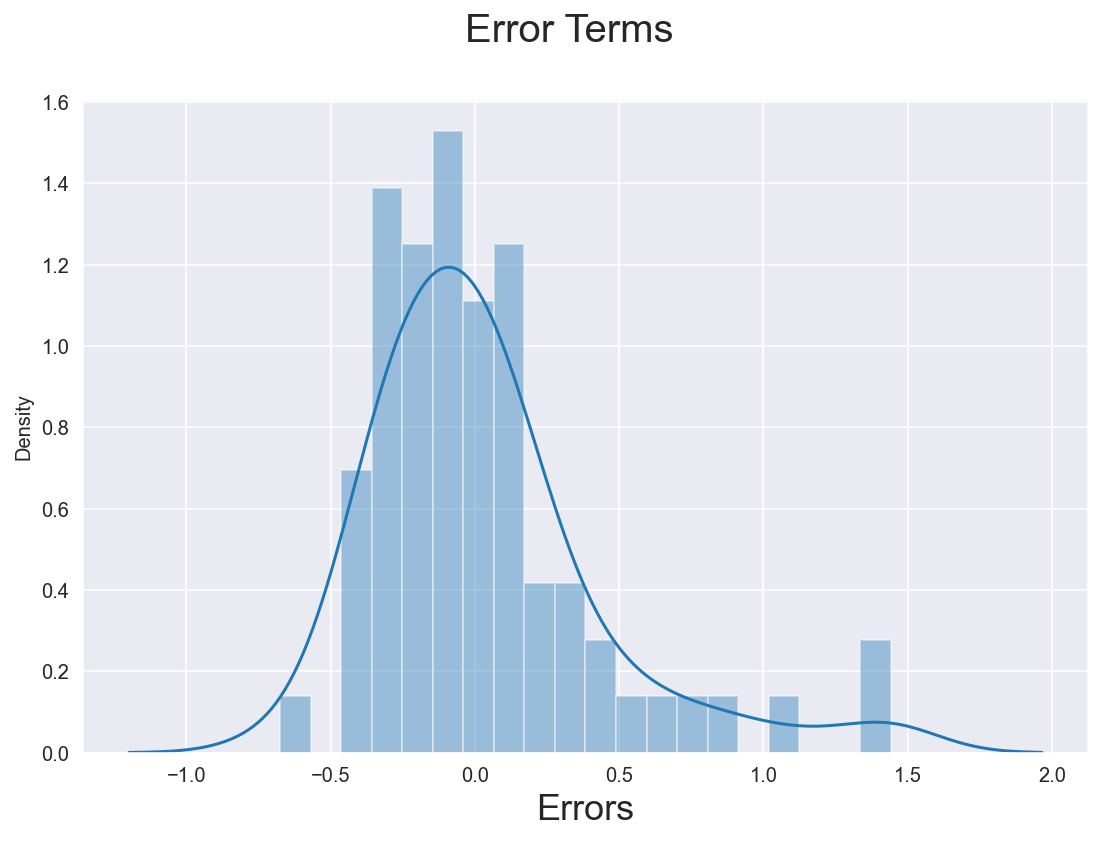

In [263]:
fig = plt.figure(figsize=(9,6))
sns.distplot(resid, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

Analysis: The error terms are a little bit asymmetric.

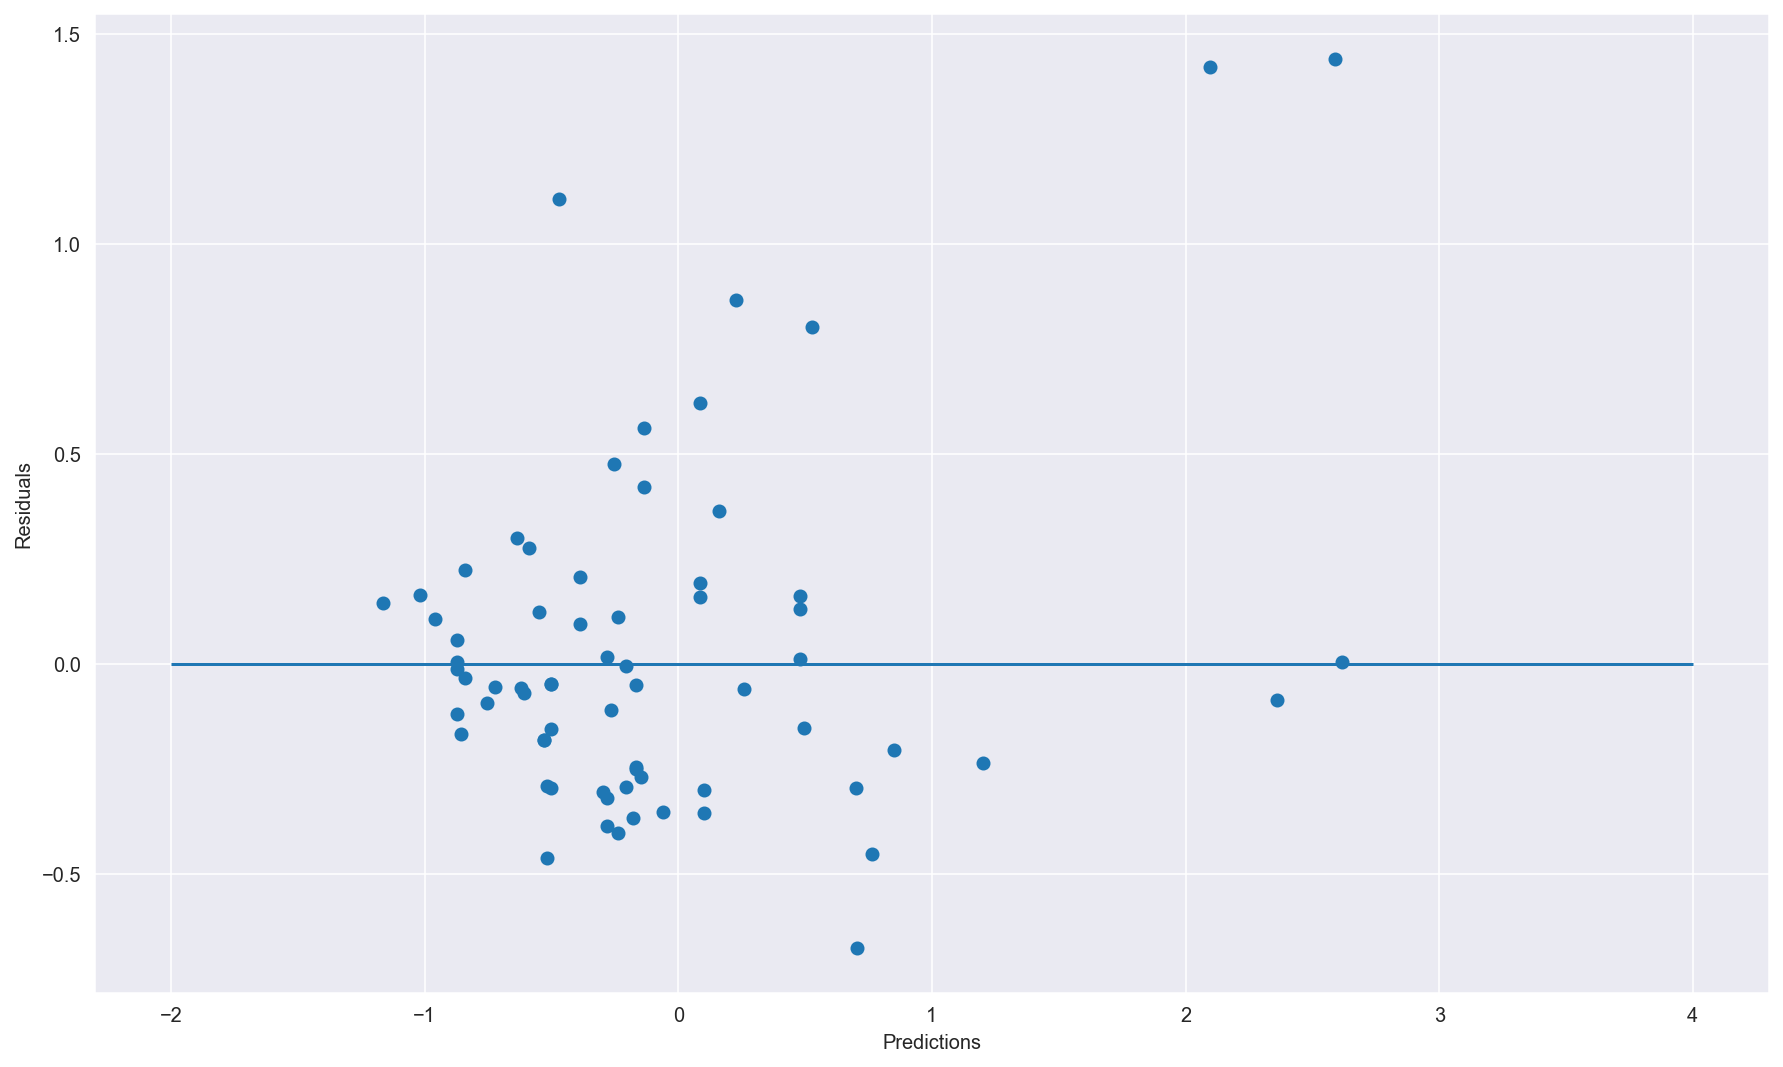

In [264]:
plt.scatter(y_pred, resid)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.hlines(0,-2,4)

Analysis: Data points are a bit more on one side than the other

#### Anderson-Darling Test and Q-Q Plot

----Anderson-Darling test ---- 
statistic: 0.9002, critical value of 5%: 0.7660


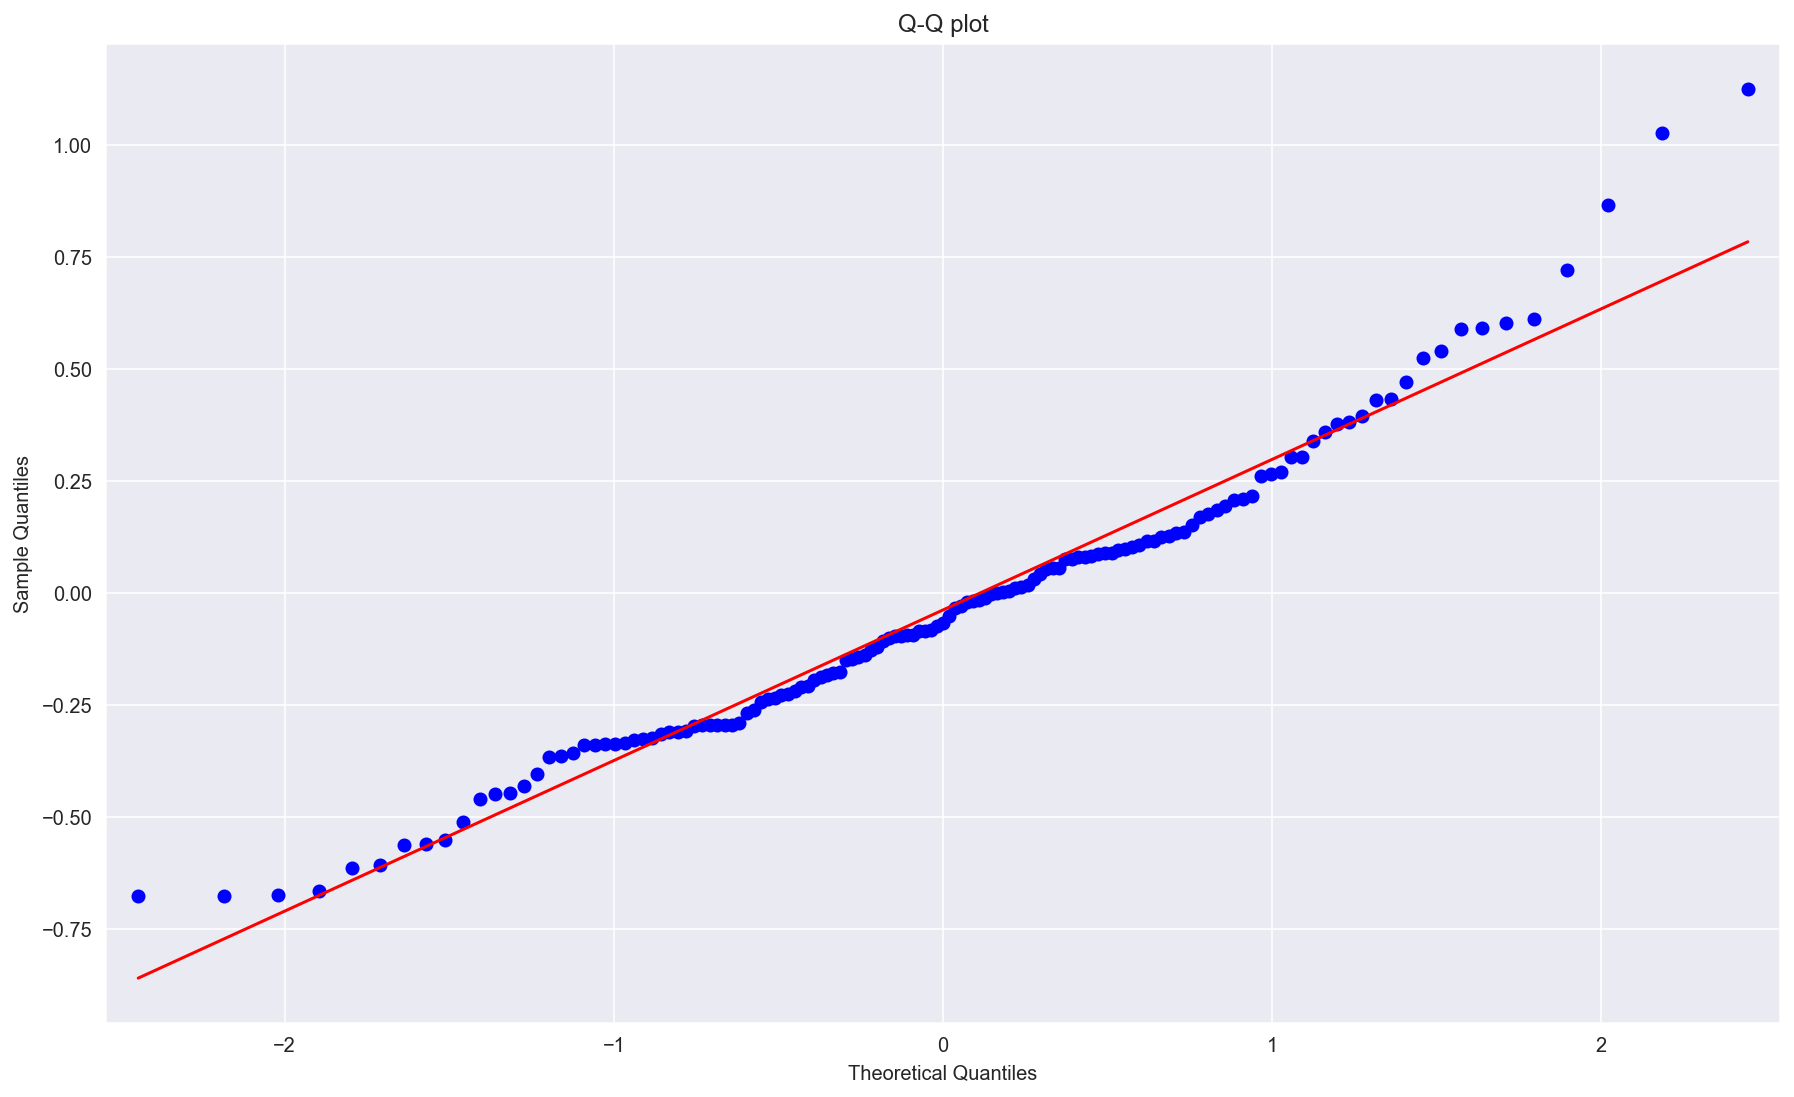

In [265]:
normality_of_residuals_test(lm)

The blue trace slightly take form of an arc, but not aggressively

The test rejects H0 that the data follow a normal distribution (stats > critical value of 5%)

Evaluation of the test via the comparison of y_pred and y_test

The aim here is that the errors should be as close as possible to the line

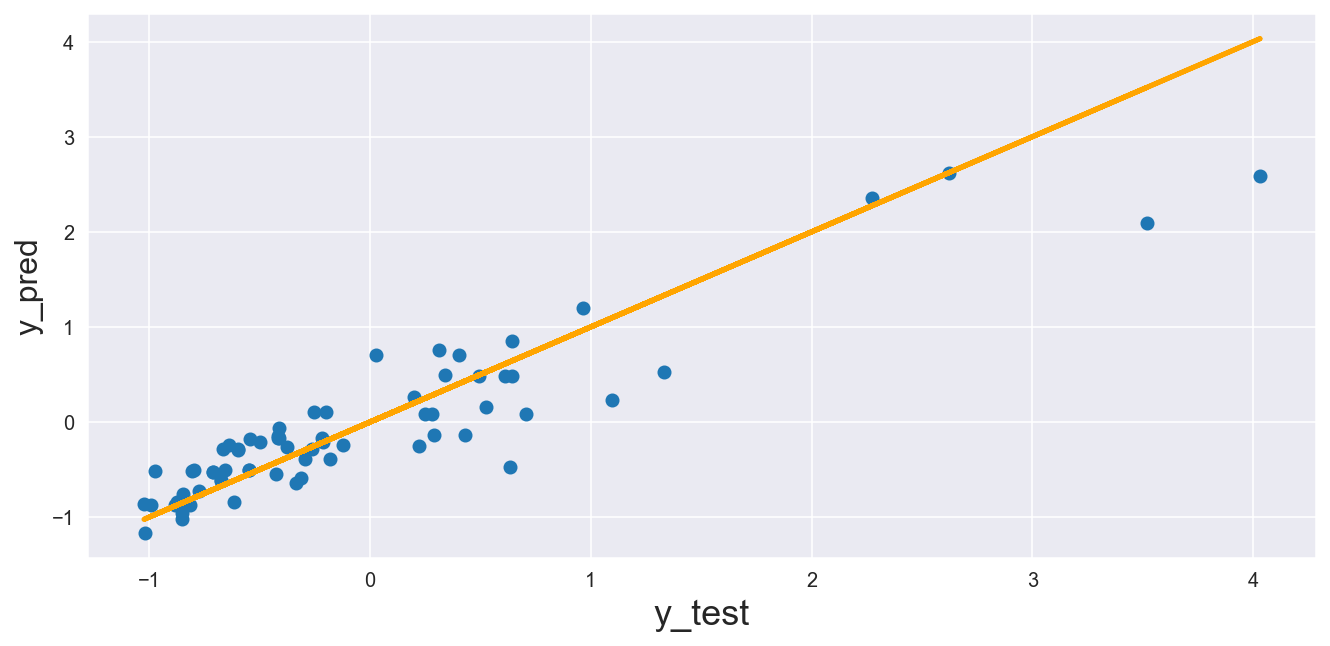

In [266]:
fig = plt.figure(figsize=(11,5))
plt.scatter(y_test,y_pred)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

#Regression Line function
f = lambda x: x

# x values of line to plot
x = np.array(y_test)

# plot fit
plt.plot(x,f(x),lw=2.5, c="orange")

In [267]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.831595084758402

##### What changed with RFE?

1.R² decreased by 0.05 and remains above 0.8 which is good.

2.The value of the Durbin-watson test has increased, indicating more independence of errors.

3.The value of the Golden-Quandt test has increased sharply from 0.070 to 0.130, and the red line remains flat. (Much better homo-scedasticity)

4.No multicollinearity.

But, we see that the hypothesis of normality of errors is violated.

Actual data rarely includes normally distributed errors, and it may not be possible to adapt your data to a model whose errors do not violate the normality assumption.

It is usually best to focus on violations of other assumptions and / or on the influence of some Outliers (who may in any case be responsible for violations of normality).

So, if I have the choice between, violating the hypothesis of multicollinearity or the hypothesis of normality of the errors. I will choose normality because it is the least sensitive hypothesis among the others.


In [268]:
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                              145.8
Date:                Wed, 04 Jan 2023   Prob (F-statistic):                    2.27e-58
Time:                        19:49:26   Log-Likelihood:                         -45.931
No. Observations:                 137   AIC:                                      105.9
Df Residuals:                     130   BIC:                                      126.3
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

### Final Observations

All the P-Values are under 0.05. Also, the Previous Alert that we had about existence of Multi-colinearity is not there any more

Reduction of dimension

7 variables against 59 for R²> 0.8 !!! It's much better

Is it good ?

Still not 100% perfect, because of the existence of Outliers that strongly affect our model

Next step ?

Detect and treat Outliers (either delete them, or fix them if there are errors) and see if there are improvements.
